<div style="display: flex; background-color:rgb(214, 234, 248 );" >
<h1 style="text-align: center;margin: auto; padding: 40px; "> Segmentez des clients d'un site e-commerce
    Projet 5 Notebook Analyse exploratoire</h1>
    <p >  Zeynep Erdem 
      
</p>
      
  
</div>

<div>
    <img style="float: right;margin:60px 5px 5px 0.1px" width="100px" src="logo.png"  height=500   />
</div>
<div style="display: flex; background-color:rgb(213, 219, 219);" >
<div> 
    
* Je suis consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.
* Olist souhaite que je fournisse à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.
* Mon objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

* Je dois fournir à l’équipe marketing :

   1 - Une description actionable de ma segmentation et de sa logique sous-jacente pour une utilisation optimale.
    
   2 - Une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.
    
* Voici [les données](https://www.kaggle.com/olistbr/brazilian-ecommerce) anonymisée comportant des informations sur l’historique de commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017. 

</div>

</div>


<a name="top"></a>

# Sommaire :

**Partie 1**

 - <a href="#C1"> 1.1 Importation des librairies</a>
 - <a href="#C2"> 1.2 Importation des données</a>
 
**Partie 2 : Les premières analyses sur les fichiers**
 - <a href="#C3"> 2.1 Les premières analyses sur les fichiers et dédoublonner des clés primairès </a>
 - <a href="#C4"> 2.2 Les jointures des fichiers et imputation des valeurs manquantes </a>
 
**Partie 3 : Les analyses exploratoires**

 - <a href="#C5"> 3.1 Analyse Univarié</a>
 - <a href="#C6"> 3.2 Analyse Bivarié</a>
     
**Partie 4 : Feature Engineering**
 - <a href="#C7"> Création des variables Recence Fréquence Montant Review(satisfaction) Deliver duration(durée livraison)  </a> 
 
**Partie 5 : Création de fichier csv avec des données nettoyées et imputées**
 - <a href="#C8"> Création de fichier csv avec des données nettoyées et imputées</a> 

# <a name="C1"> 1.1 Importation des librairies</a>
<a href="#top">sommaire</a>

In [1]:
pwd

'/Users/zeyneperdem/Desktop/ds_prep/p5/livrables'

In [2]:
# Installation des libraries

# !pip install pandas
# !pip install missingno
# !pip install matplotlib
# !pip install seaborn
# !pip install numpy
# !pip install black

In [3]:
# Importation des libraries
import sys
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import missingno as msno
import sklearn
import warnings

import functions
from functions import *

from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

%matplotlib inline
warnings.filterwarnings("ignore")

In [4]:
# Les versions des libraries
print("Python: ", sys.version)
print("Pandas: ", pd.__version__)
print("Numpy: ", np.__version__)
print("Seaborn: ", sns.__version__)
print("Matplotlib: ", matplotlib.__version__)
print("Missingno: ", msno.__version__)
print("Sklearn: ", sklearn.__version__)

Python:  3.9.16 (main, May 16 2023, 14:27:50) 
[Clang 14.0.6 ]
Pandas:  2.0.2
Numpy:  1.24.3
Seaborn:  0.12.2
Matplotlib:  3.7.1
Missingno:  0.5.2
Sklearn:  1.2.2


In [5]:
# Les options pour visualisations des dataframes
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_colwidth', 1200)
# pd.set_option('display.max_rows', 200)

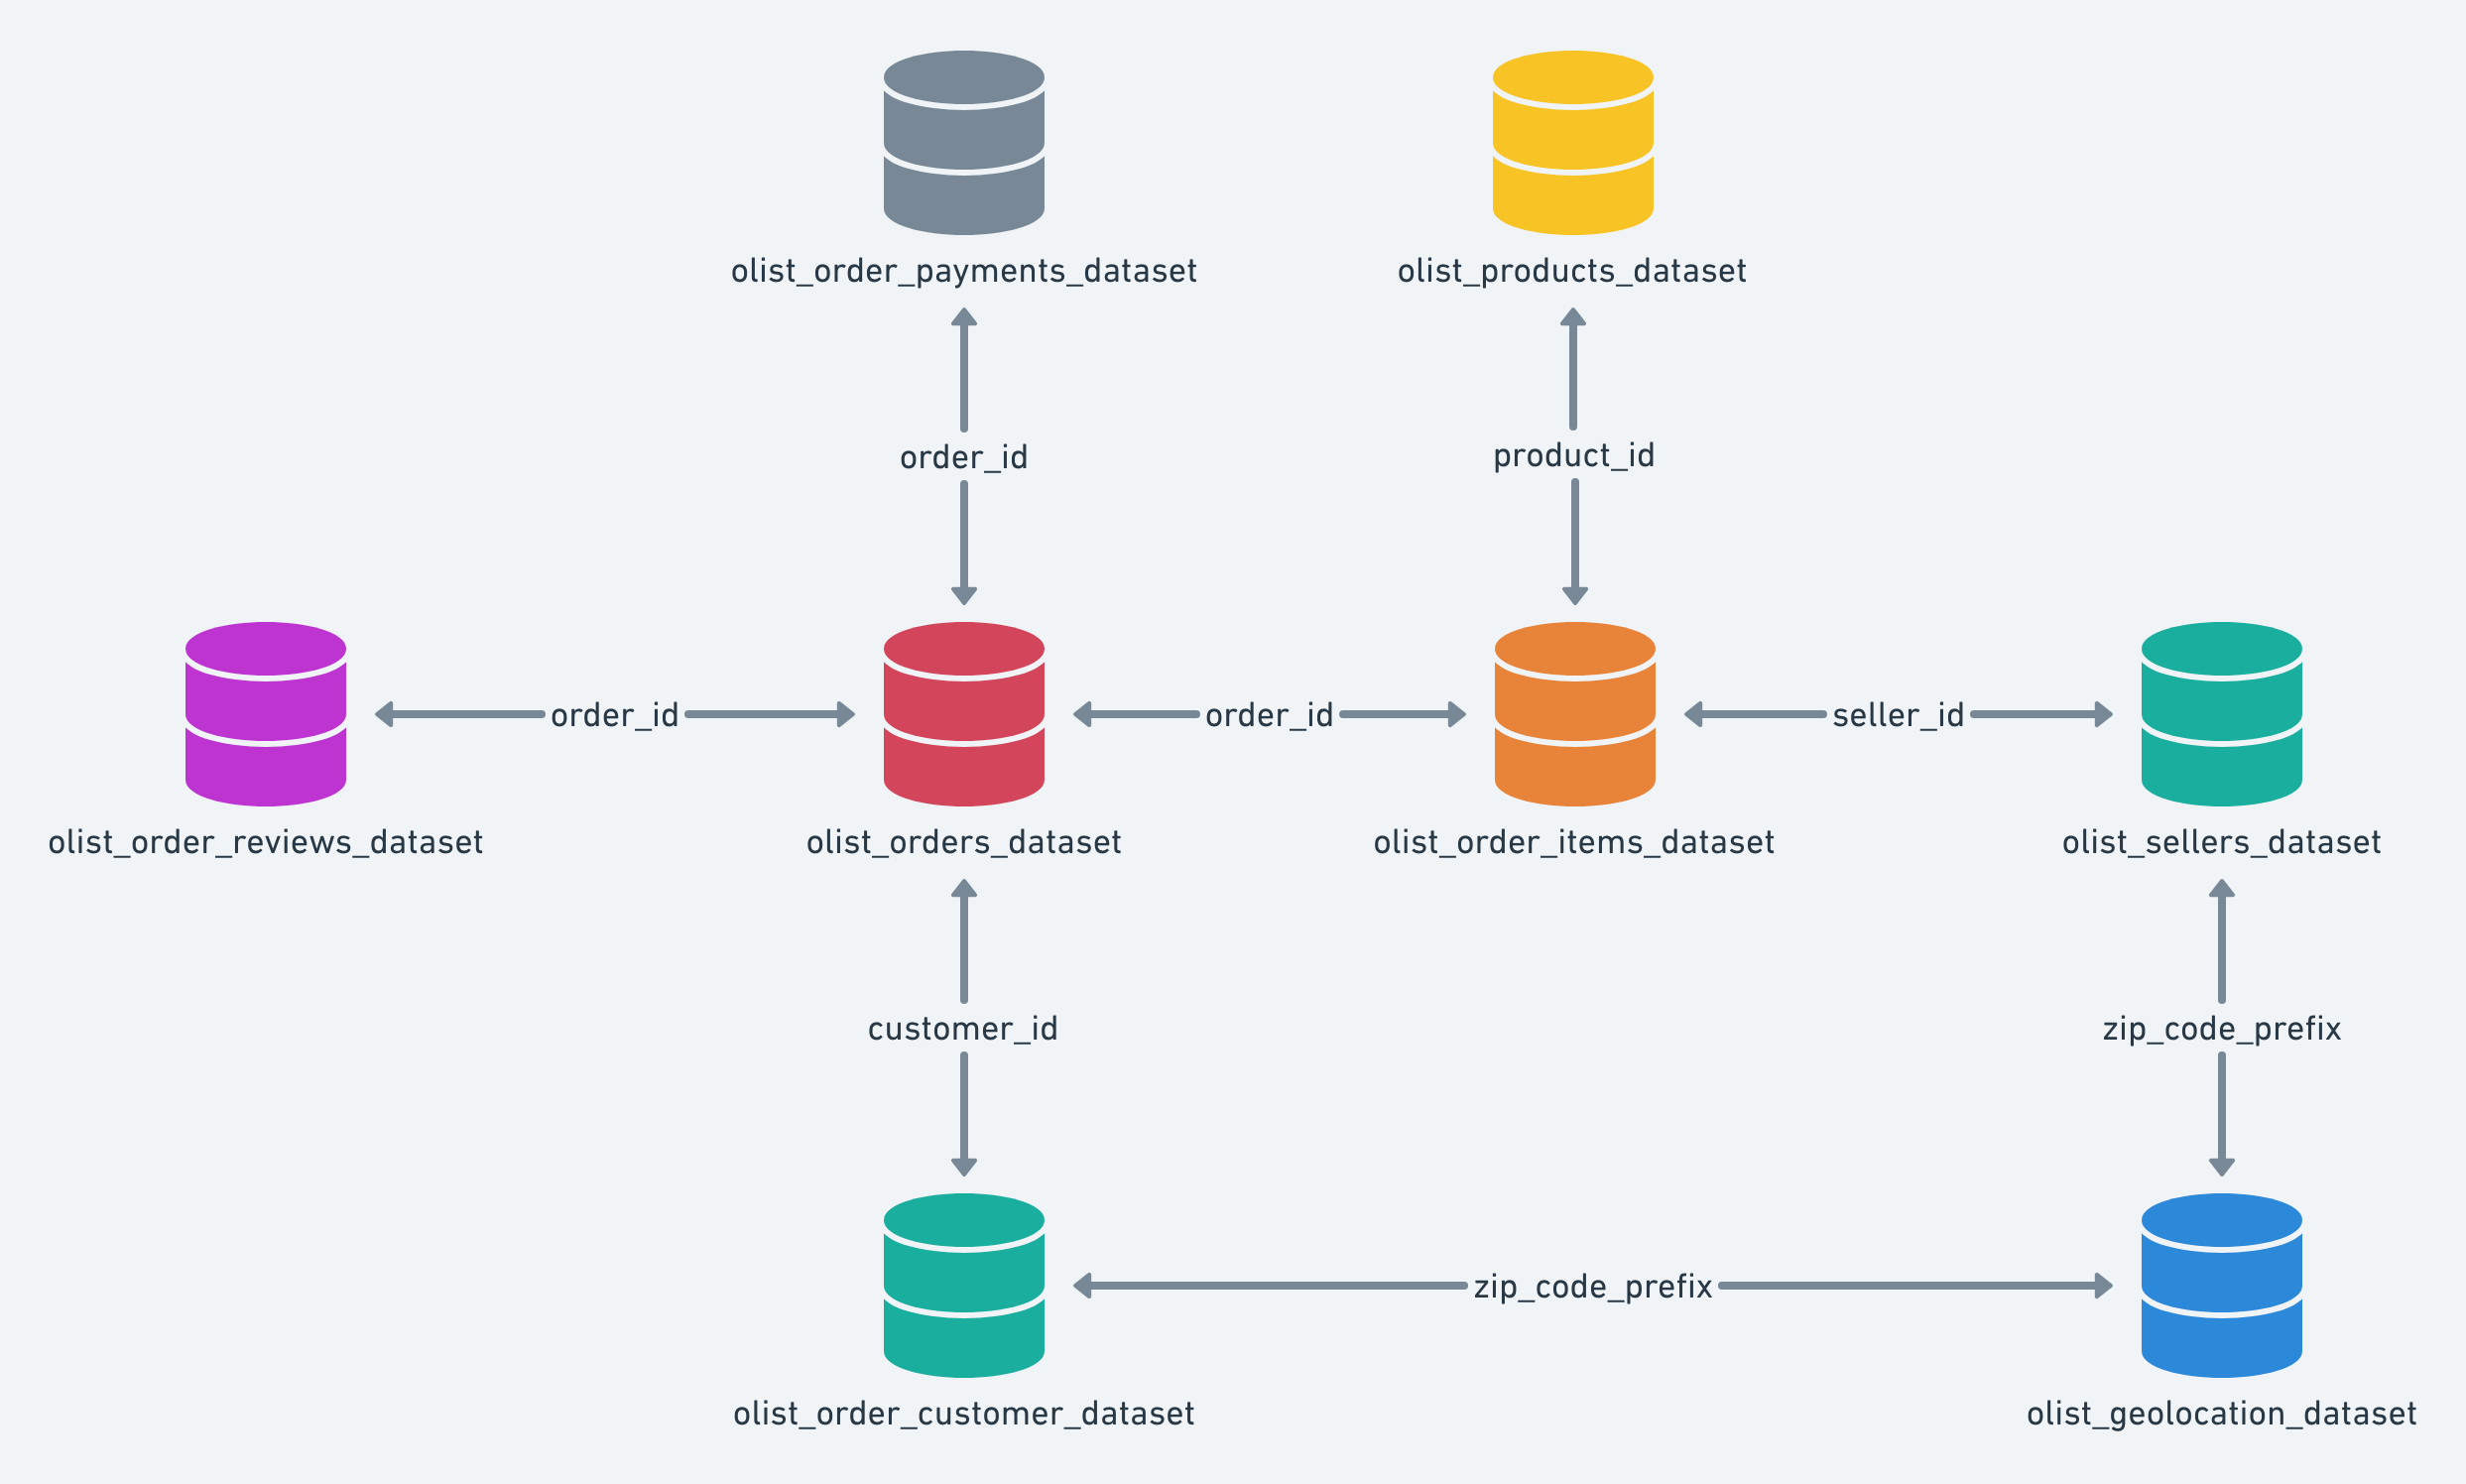

In [6]:
from IPython.display import Image

Image(filename="data_shema.png")

In [7]:
# black example.py
# black <file_or_directory_path>

# <a name="C2"> 1.2 Importation des données</a>
<a href="#top">sommaire</a>

In [8]:
path1 = "data/olist_customers_dataset.csv"
path2 = "data/olist_geolocation_dataset.csv"
path3 = "data/olist_order_items_dataset.csv"
path4 = "data/olist_order_payments_dataset.csv"
path5 = "data/olist_order_reviews_dataset.csv"
path6 = "data/olist_orders_dataset.csv"
path7 = "data/olist_products_dataset.csv"
path8 = "data/olist_sellers_dataset.csv"
path9 = "data/product_category_name_translation.csv"
customers = pd.read_csv(path1)
geoloc = pd.read_csv(path2)
order_items = pd.read_csv(path3)
orders_payments = pd.read_csv(path4)
reviews = pd.read_csv(path5)
orders = pd.read_csv(path6)
products = pd.read_csv(path7)
sellers = pd.read_csv(path8)
translation = pd.read_csv(path9)

# Les premières analyses sur les fichiers

# <a name="C3"> 2.1 Les premières analyses sur les fichiers et dédoublonner des clés primairès</a>

<a href="#top">sommaire</a>

## On va obtenir des informations générales sur les dataframes

### customers

In [9]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [10]:
# On va changer le nom de la colonne
customers.rename(columns={"customer_zip_code_prefix": "zip_code_prefix"}, inplace=True)

In [11]:
info_general(customers)

************************* * INFORMATIONS GENERALES DE NOTRE DATAFRAME * *************************
----------------------------------------------------------------------------------------------------

Il y a 99441 lignes et 5 colonnes dans notre dataframe.
----------------------------------------------------------------------------------------------------
* On obtiens l'info sur notre dataframe * 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   zip_code_prefix     99441 non-null  int64 
 3   customer_city       99441 non-null  object
 4   customer_state      99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customer_id,99441,99441,06b8999e2fba1a1fbc88172c00ba8bc7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_unique_id,99441,96096,8d50f5eadf50201ccdcedfb9e2ac8455,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code_prefix,99441.0,NaN,NaN,NaN,35137.474583,29797.938996,1003.0,11347.0,24416.0,58900.0,99990.0
customer_city,99441,4119,sao paulo,15540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_state,99441,27,SP,41746,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
*On vérifie s'il y a des doublons dans notre dataframe* 
** Il n'y a pas de doublons **
----------------------------------------------------------------------------------------------------
** On vérifie s'il y a des valeurs nulles et on display pourcentage des valeurs nulles par colonne en descendant **
----------------------------------------------------------------------------------------------------
** On a  0.0 % de valeur nulle dans notre dataframe **
----------------------------------------------------------------------------------------------------


Il y a  4119 unique  customer_city dans notre data.


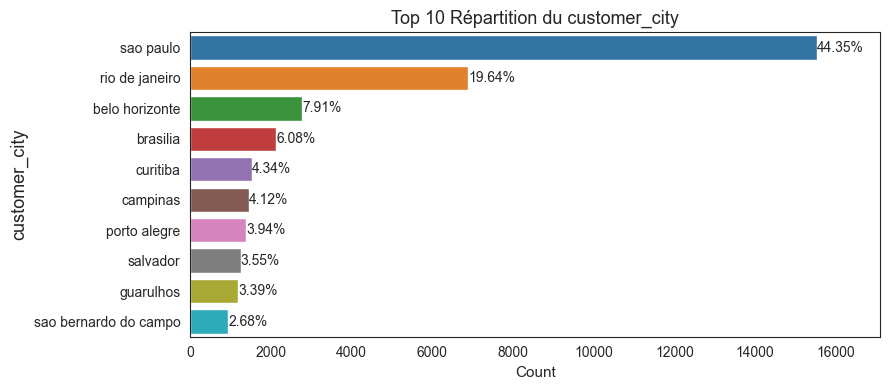

In [12]:
countplot_top10(customers, "customer_city")

La plupart des clients se situent sur la côte

In [13]:
# On va verifier les doublons pour la colonne id ce qu'on va utiliser pour les jointures
customers.customer_id.duplicated().sum()

0

In [14]:
customers.customer_unique_id.duplicated().sum()

3345

In [15]:
customers.customer_unique_id.duplicated().sum() / customers.shape[0]

0.033638036624732255

3 % des clients ont passé plusieurs commandes, comme indiqué dans l'énoncé.

### geoloc

In [16]:
geoloc.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [17]:
# On va changer le nom de la colonne
geoloc.rename(columns={"geolocation_zip_code_prefix": "zip_code_prefix"}, inplace=True)

In [18]:
info_general(geoloc)

************************* * INFORMATIONS GENERALES DE NOTRE DATAFRAME * *************************
----------------------------------------------------------------------------------------------------

Il y a 1000163 lignes et 5 colonnes dans notre dataframe.
----------------------------------------------------------------------------------------------------
* On obtiens l'info sur notre dataframe * 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   zip_code_prefix    1000163 non-null  int64  
 1   geolocation_lat    1000163 non-null  float64
 2   geolocation_lng    1000163 non-null  float64
 3   geolocation_city   1000163 non-null  object 
 4   geolocation_state  1000163 non-null  object 
dtypes: float64(2), int64(1), objec

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
zip_code_prefix,1000163.0,NaN,NaN,NaN,36574.166466,30549.33571,1001.0,11075.0,26530.0,63504.0,99990.0
geolocation_lat,1000163.0,NaN,NaN,NaN,-21.176153,5.715866,-36.605374,-23.603546,-22.919377,-19.97962,45.065933
geolocation_lng,1000163.0,NaN,NaN,NaN,-46.390541,4.269748,-101.466766,-48.573172,-46.637879,-43.767709,121.105394
geolocation_city,1000163,8011,sao paulo,135800,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geolocation_state,1000163,27,SP,404268,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
*On vérifie s'il y a des doublons dans notre dataframe* 
** Il y a  261831  doublons **
----------------------------------------------------------------------------------------------------
** On vérifie s'il y a des valeurs nulles et on display pourcentage des valeurs nulles par colonne en descendant **
----------------------------------------------------------------------------------------------------
** On a  0.0 % de valeur nulle dans notre dataframe **
----------------------------------------------------------------------------------------------------


In [19]:
# On va vérifier et supprimer les doublons
geoloc = drop_duplicates(geoloc, "zip_code_prefix")
print(geoloc.shape)

981148 duplicate rows have been dropped.
(19015, 5)


In [20]:
# On va supprimer les colonnes qui ne sont pas necéssaires pour nos analyses
col_drop1 = ["geolocation_city", "geolocation_state"]
df_geo = geoloc.drop(columns=col_drop1)
print(df_geo.shape)
df_geo.head(2)

(19015, 3)


,zip_code_prefix,geolocation_lat,geolocation_lng
0,1037,-23.545621,-46.639292
1,1046,-23.546081,-46.644820


### orders

In [21]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


************************* * INFORMATIONS GENERALES DE NOTRE DATAFRAME * *************************
----------------------------------------------------------------------------------------------------

Il y a 99441 lignes et 8 colonnes dans notre dataframe.
----------------------------------------------------------------------------------------------------
* On obtiens l'info sur notre dataframe * 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              9

,count,unique,top,freq
order_id,99441,99441,e481f51cbdc54678b7cc49136f2d6af7,1
customer_id,99441,99441,9ef432eb6251297304e76186b10a928d,1
order_status,99441,8,delivered,96478
order_purchase_timestamp,99441,98875,2018-04-11 10:48:14,3
order_approved_at,99281,90733,2018-02-27 04:31:10,9
order_delivered_carrier_date,97658,81018,2018-05-09 15:48:00,47
order_delivered_customer_date,96476,95664,2018-05-08 23:38:46,3
order_estimated_delivery_date,99441,459,2017-12-20 00:00:00,522


----------------------------------------------------------------------------------------------------
*On vérifie s'il y a des doublons dans notre dataframe* 
** Il n'y a pas de doublons **
----------------------------------------------------------------------------------------------------
** On vérifie s'il y a des valeurs nulles et on display pourcentage des valeurs nulles par colonne en descendant **
----------------------------------------------------------------------------------------------------
** On a  0.62 % de valeur nulle dans notre dataframe **


,nombre_null,pourcentage_null
order_delivered_customer_date,2965,2.98
order_delivered_carrier_date,1783,1.79
order_approved_at,160,0.16
order_id,0,0.00
customer_id,0,0.00
order_status,0,0.00
order_purchase_timestamp,0,0.00
order_estimated_delivery_date,0,0.00


** Visualisation des valeurs nulles ** 
----------------------------------------------------------------------------------------------------


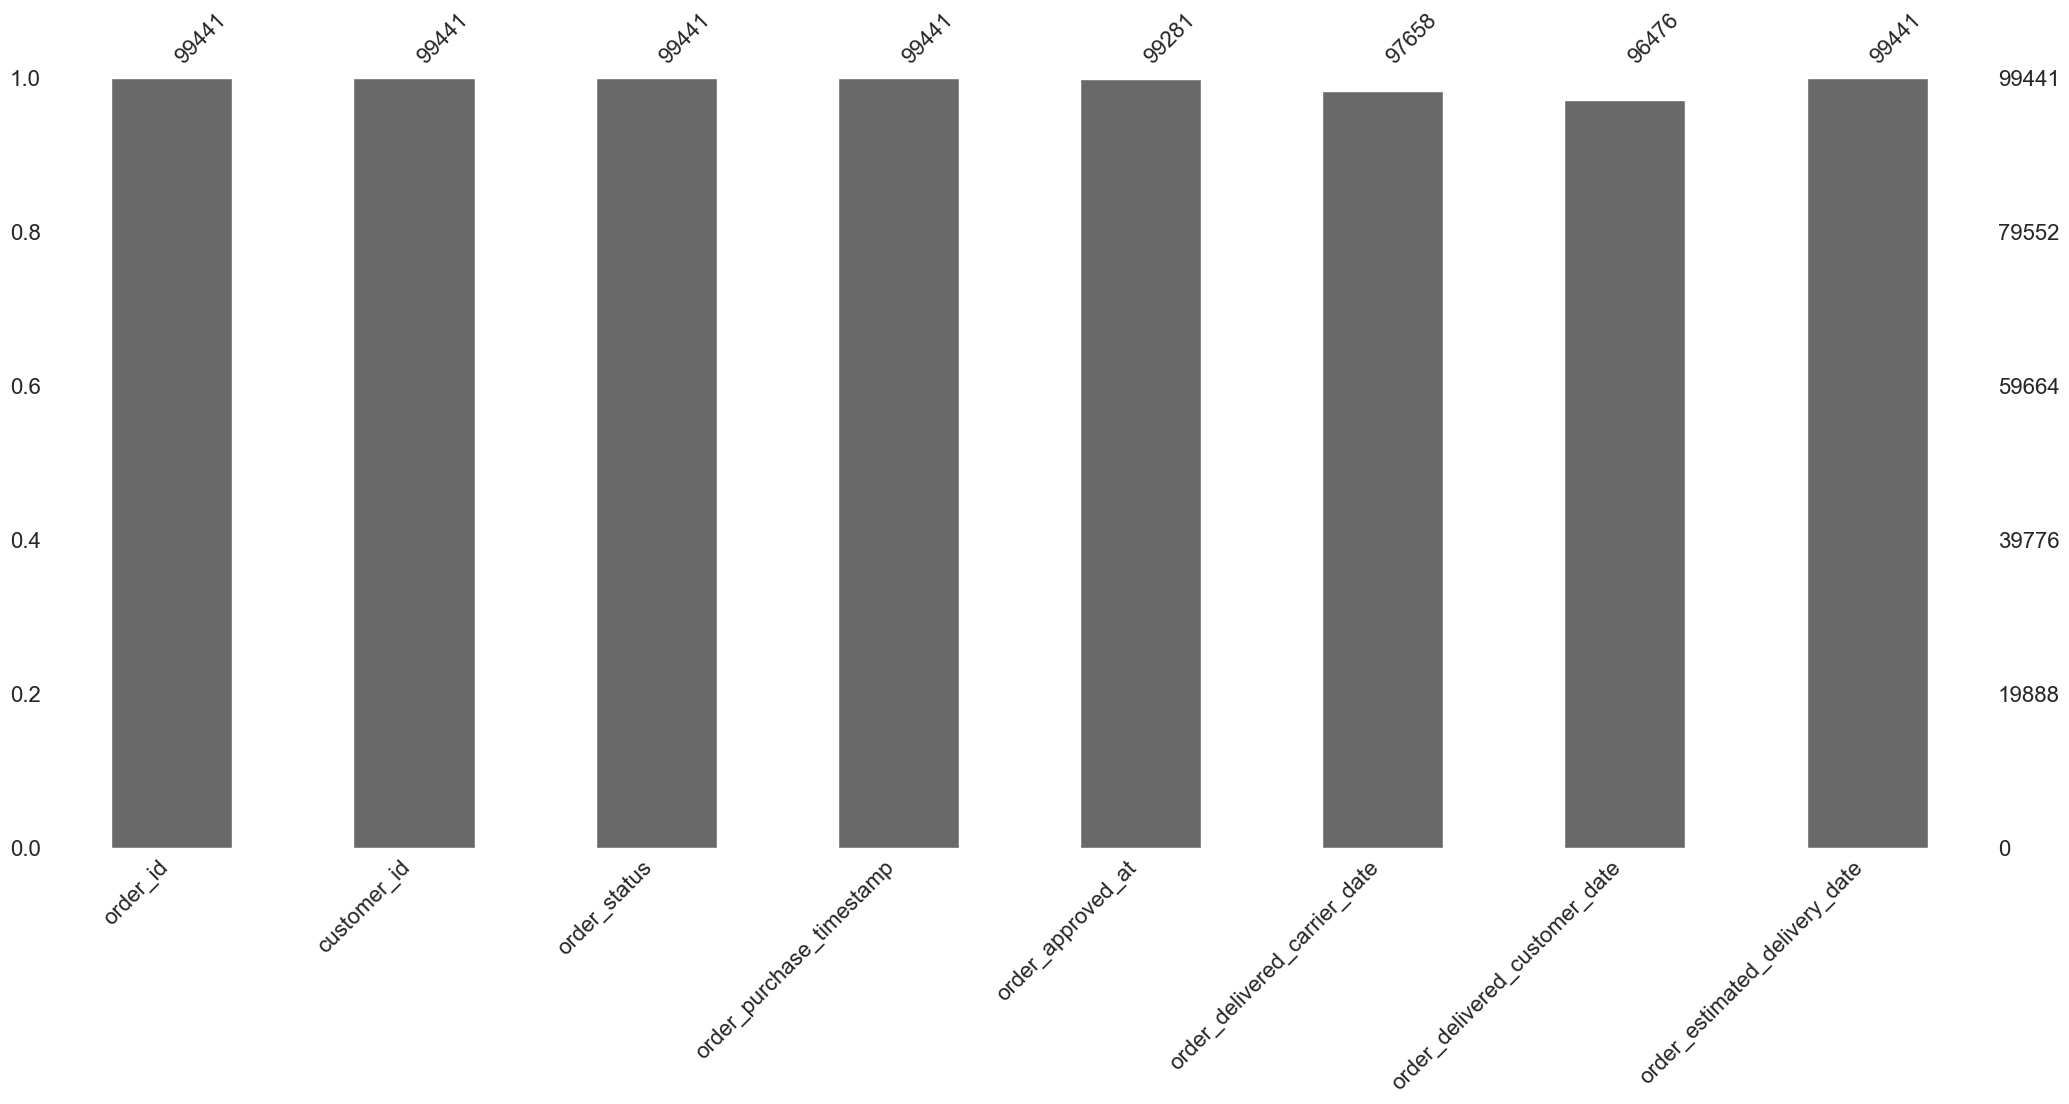

In [22]:
info_general(orders)

In [23]:
# On va vérifier doublons
orders["order_id"].duplicated().sum()

0

In [24]:
# On va supprimer les colonnes qui ne sont pas necéssaires pour nos analyses
col_drop5 = [
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_estimated_delivery_date",
]
df_orders = orders.drop(columns=col_drop5)
print(df_orders.shape)
df_orders.head(2)

(99441, 5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45


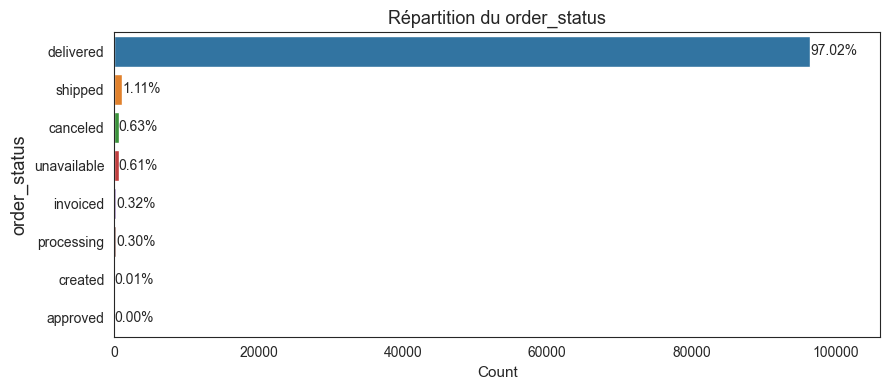

In [25]:
countplot(orders, "order_status")

In [26]:
# La plupart des commandes ont été livrées

### orders_payments

In [27]:
orders_payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [28]:
info_general(orders_payments)

************************* * INFORMATIONS GENERALES DE NOTRE DATAFRAME * *************************
----------------------------------------------------------------------------------------------------

Il y a 103886 lignes et 5 colonnes dans notre dataframe.
----------------------------------------------------------------------------------------------------
* On obtiens l'info sur notre dataframe * 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int6

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,103886,99440,fa65dad1b0e818e3ccc5cb0e39231352,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_sequential,103886.0,NaN,NaN,NaN,1.092679,0.706584,1.0,1.0,1.0,1.0,29.0
payment_type,103886,5,credit_card,76795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
payment_installments,103886.0,NaN,NaN,NaN,2.853349,2.687051,0.0,1.0,1.0,4.0,24.0
payment_value,103886.0,NaN,NaN,NaN,154.10038,217.494064,0.0,56.79,100.0,171.8375,13664.08


----------------------------------------------------------------------------------------------------
*On vérifie s'il y a des doublons dans notre dataframe* 
** Il n'y a pas de doublons **
----------------------------------------------------------------------------------------------------
** On vérifie s'il y a des valeurs nulles et on display pourcentage des valeurs nulles par colonne en descendant **
----------------------------------------------------------------------------------------------------
** On a  0.0 % de valeur nulle dans notre dataframe **
----------------------------------------------------------------------------------------------------


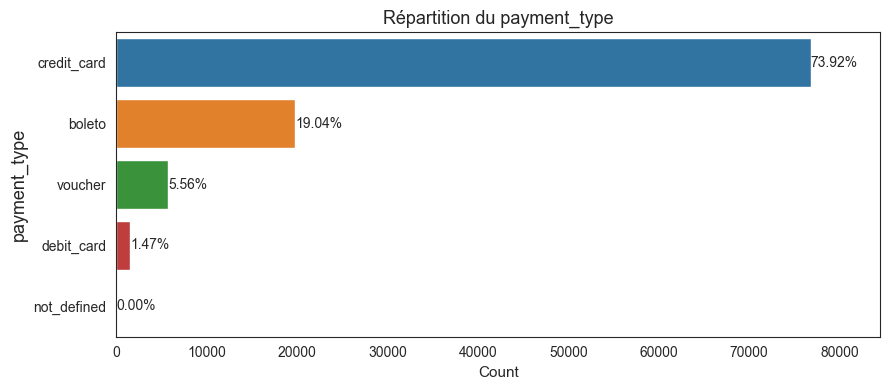

In [29]:
countplot(orders_payments, "payment_type")

In [30]:
# La plupart des commandes ont été payées par carte bancaire

In [31]:
# On va vérifier doublons
orders_payments.order_id.duplicated().sum()

4446

In [32]:
orders_payments.order_id.value_counts()

order_id
fa65dad1b0e818e3ccc5cb0e39231352    29
ccf804e764ed5650cd8759557269dc13    26
285c2e15bebd4ac83635ccc563dc71f4    22
895ab968e7bb0d5659d16cd74cd1650c    21
fedcd9f7ccdc8cba3a18defedd1a5547    19
                                    ..
6d2a30c9b7dcee3ed507dc9a601f99e7     1
a7737f6d9208dd56ea498a322ed3c37f     1
646e62df54f3e236eb6d5ff3b31429b8     1
e115da7a49ec2acf622e1f31da65cfb9     1
28bbae6599b09d39ca406b747b6632b1     1
Name: count, Length: 99440, dtype: int64

In [33]:
orders_payments[orders_payments.order_id == "ccf804e764ed5650cd8759557269dc13"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
4346,ccf804e764ed5650cd8759557269dc13,19,voucher,1,1.68
14362,ccf804e764ed5650cd8759557269dc13,1,credit_card,1,2.20
16279,ccf804e764ed5650cd8759557269dc13,14,voucher,1,0.97
18876,ccf804e764ed5650cd8759557269dc13,15,voucher,1,1.11
21447,ccf804e764ed5650cd8759557269dc13,6,voucher,1,2.26
32393,ccf804e764ed5650cd8759557269dc13,26,voucher,1,23.10
38001,ccf804e764ed5650cd8759557269dc13,2,voucher,1,1.45
39132,ccf804e764ed5650cd8759557269dc13,25,voucher,1,1.53
40369,ccf804e764ed5650cd8759557269dc13,5,voucher,1,2.69
40387,ccf804e764ed5650cd8759557269dc13,3,voucher,1,1.15


Comme certains clients ont effectué des paiements en plusieurs fois avec différents types de paiement, il peut y avoir des doublons d'ids de commande.

In [34]:
# On va aggreger les colonnes par order_id

In [35]:
orders_payments_grouped = (
    orders_payments.groupby("order_id")
    .agg(
        {
            "payment_sequential": "max",
            "payment_type": "nunique",
            "payment_value": "sum",
        }
    )
    .reset_index()
)

# On va changer le nom de la colonne
orders_payments_grouped.rename(
    columns={
        "payment_sequential": "payment_sequential_max",
        "payment_type": "payment_type_num",
        "payment_value": "payment_value_sum",
    },
    inplace=True,
)
print(orders_payments_grouped.shape)
orders_payments_grouped.head(2)

(99440, 4)


,order_id,payment_sequential_max,payment_type_num,payment_value_sum
0,00010242fe8c5a6d1ba2dd792cb16214,1,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,1,259.83


### order_items

In [36]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [37]:
info_general(order_items)

************************* * INFORMATIONS GENERALES DE NOTRE DATAFRAME * *************************
----------------------------------------------------------------------------------------------------

Il y a 112650 lignes et 7 colonnes dans notre dataframe.
----------------------------------------------------------------------------------------------------
* On obtiens l'info sur notre dataframe * 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                11265

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_item_id,112650.0,NaN,NaN,NaN,1.197834,0.705124,1.0,1.0,1.0,1.0,21.0
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,112650.0,NaN,NaN,NaN,120.653739,183.633928,0.85,39.9,74.99,134.9,6735.0
freight_value,112650.0,NaN,NaN,NaN,19.99032,15.806405,0.0,13.08,16.26,21.15,409.68


----------------------------------------------------------------------------------------------------
*On vérifie s'il y a des doublons dans notre dataframe* 
** Il n'y a pas de doublons **
----------------------------------------------------------------------------------------------------
** On vérifie s'il y a des valeurs nulles et on display pourcentage des valeurs nulles par colonne en descendant **
----------------------------------------------------------------------------------------------------
** On a  0.0 % de valeur nulle dans notre dataframe **
----------------------------------------------------------------------------------------------------


In [38]:
# On va vérifier les doublons
order_items.order_id.duplicated().sum()

13984

In [39]:
order_items.order_id.value_counts()

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: count, Length: 98666, dtype: int64

In [40]:
order_items[order_items.order_id == "8272b63d03f5f79c56e9e4120aec44ef"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


Comme certains clients ont commandé plusieurs produits dans une même commande, il peut y avoir des doublons pour l'ID de commande. Nous allons dédoublonner lors des jointures.

In [41]:
order_items[["order_id", "order_item_id"]].duplicated().sum()

0

In [42]:
# On va supprimer les colonnes qui ne sont pas necéssaires pour nos analyses
col_drop2 = ["shipping_limit_date", "freight_value"]
df_order_items = order_items.drop(columns=col_drop2)
print(df_order_items.shape)
df_order_items.head(2)

(112650, 5)


,order_id,order_item_id,product_id,seller_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9


### reviews

In [43]:
reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


************************* * INFORMATIONS GENERALES DE NOTRE DATAFRAME * *************************
----------------------------------------------------------------------------------------------------

Il y a 99224 lignes et 7 colonnes dans notre dataframe.
----------------------------------------------------------------------------------------------------
* On obtiens l'info sur notre dataframe * 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
review_id,99224,98410,7b606b0d57b078384f0b58eac1d41d78,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_id,99224,98673,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_score,99224.0,NaN,NaN,NaN,4.086421,1.347579,1.0,4.0,5.0,5.0,5.0
review_comment_title,11568,4527,Recomendo,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_comment_message,40977,36159,Muito bom,230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_creation_date,99224,636,2017-12-19 00:00:00,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_answer_timestamp,99224,98248,2017-06-15 23:21:05,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
*On vérifie s'il y a des doublons dans notre dataframe* 
** Il n'y a pas de doublons **
----------------------------------------------------------------------------------------------------
** On vérifie s'il y a des valeurs nulles et on display pourcentage des valeurs nulles par colonne en descendant **
----------------------------------------------------------------------------------------------------
** On a  21.01 % de valeur nulle dans notre dataframe **


,nombre_null,pourcentage_null
review_comment_title,87656,88.34
review_comment_message,58247,58.70
review_id,0,0.00
order_id,0,0.00
review_score,0,0.00
review_creation_date,0,0.00
review_answer_timestamp,0,0.00


** Visualisation des valeurs nulles ** 
----------------------------------------------------------------------------------------------------


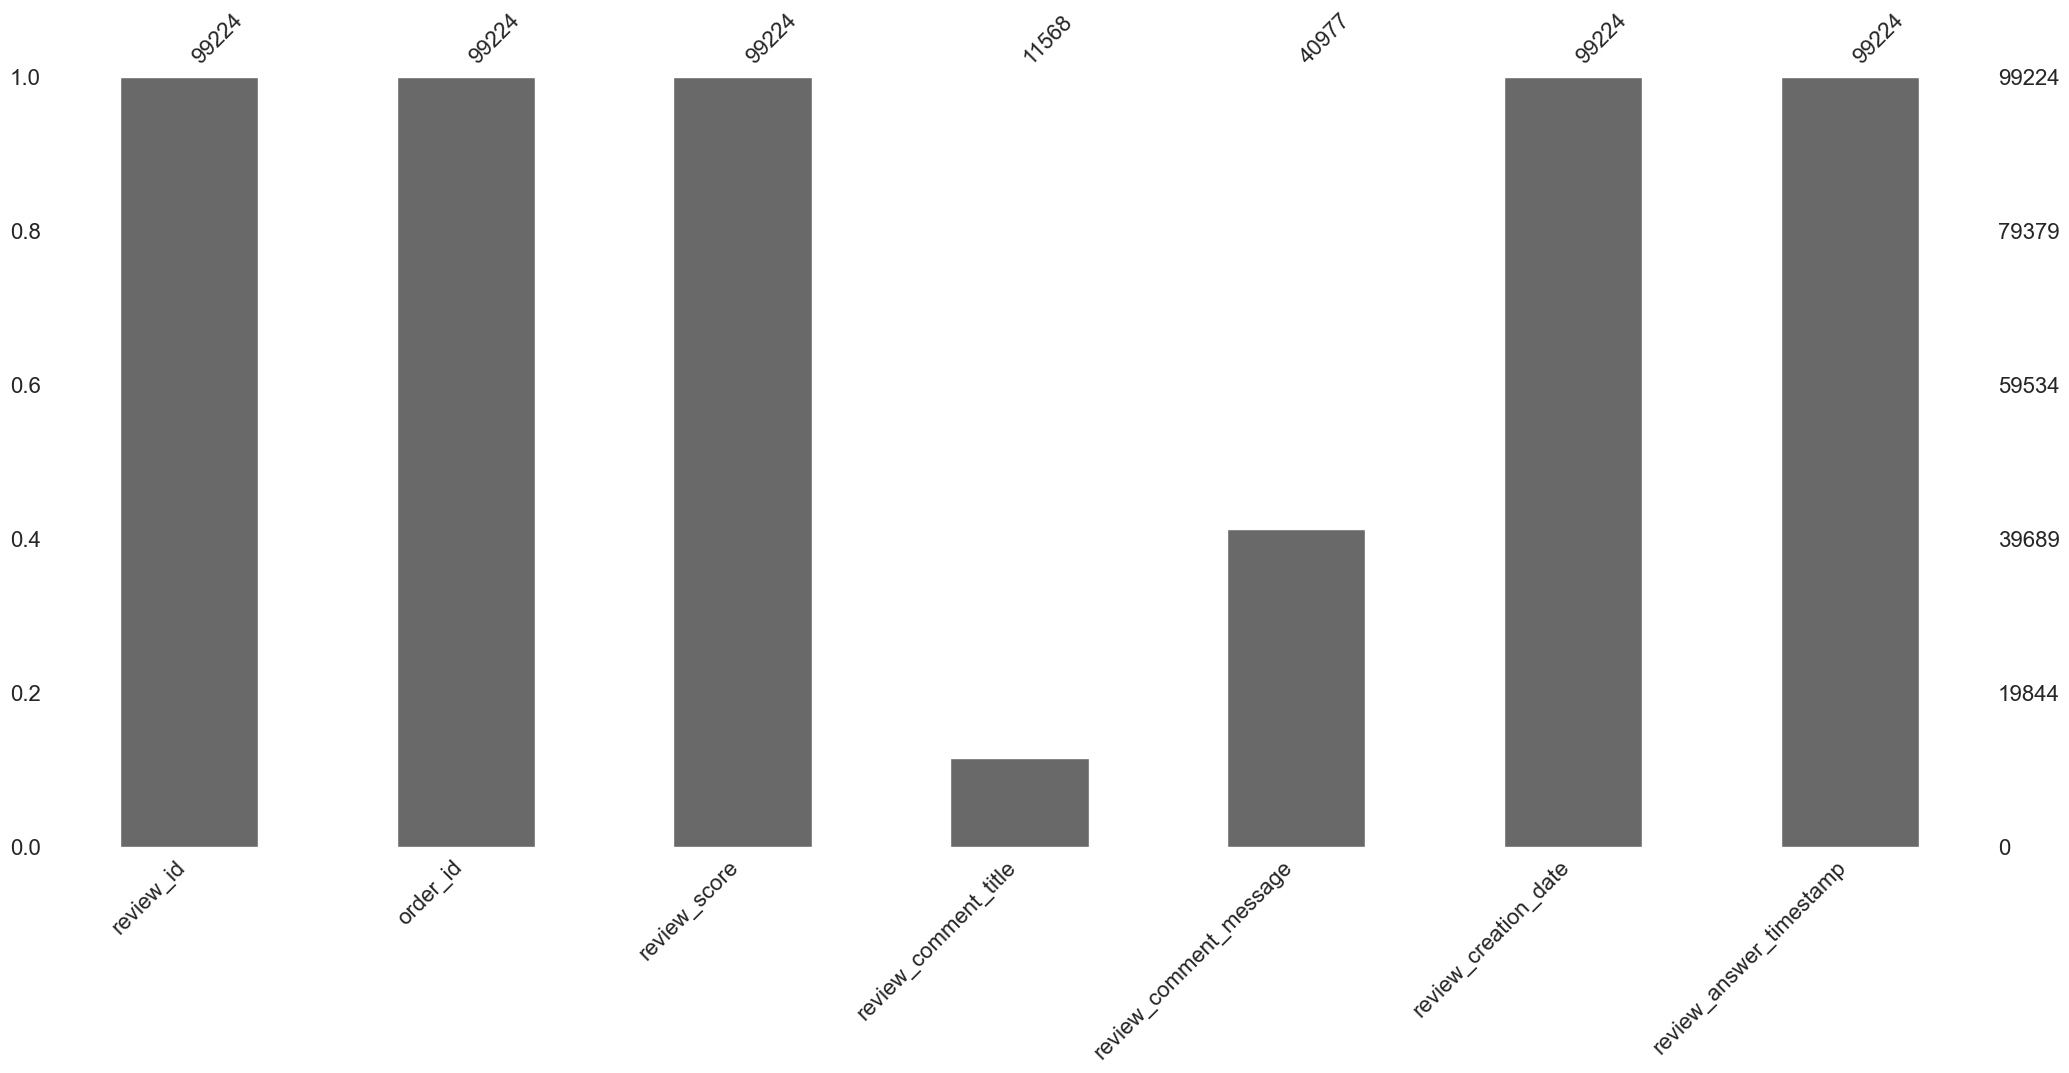

In [44]:
info_general(reviews)

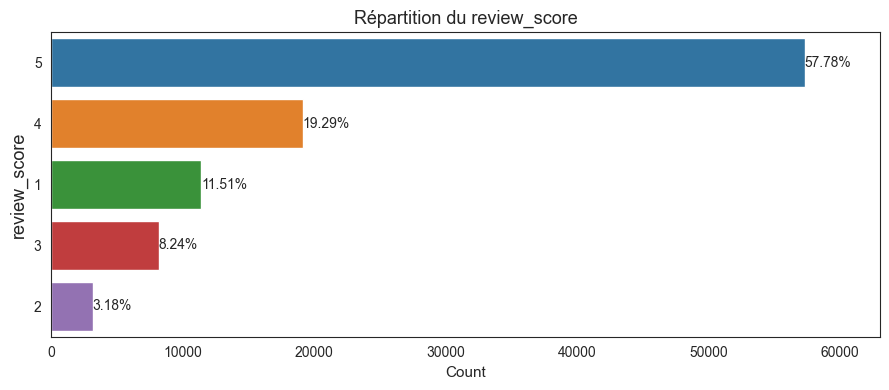

In [45]:
countplot(reviews, "review_score")

In [46]:
# La plupart des clients sont satisfaits de nos services.

In [47]:
# On vérifie les doublons
reviews["order_id"].duplicated().sum()

551

In [48]:
reviews.order_id.value_counts()

order_id
c88b1d1b157a9999ce368f218a407141    3
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
5cb890a68b91b6158d69257e4e2bc359    2
                                   ..
5b4e9a12d219f34f5c2de9f8d620b19d    1
a6da096d974acc000962856d7386448a    1
75e0647c26de647eca3421e9cc66c9da    1
bad0467c52f23cdc71e9fa139d4a8afd    1
90531360ecb1eec2a1fbb265a0db0508    1
Name: count, Length: 98673, dtype: int64

In [49]:
reviews[reviews.order_id == "c88b1d1b157a9999ce368f218a407141"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1985,ffb8cff872a625632ac983eb1f88843c,c88b1d1b157a9999ce368f218a407141,3,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:41:07
82525,202b5f44d09cd3cfc0d6bd12f01b044c,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-22 00:00:00,2017-07-26 13:40:22
89360,fb96ea2ef8cce1c888f4d45c8e22b793,c88b1d1b157a9999ce368f218a407141,5,NaN,NaN,2017-07-21 00:00:00,2017-07-26 13:45:15


In [50]:
# Il y a plusieurs notes pour certaines commandes 

In [51]:
reviews["review_id"].duplicated().sum()

814

In [52]:
reviews.review_id.value_counts()

review_id
7b606b0d57b078384f0b58eac1d41d78    3
dbdf1ea31790c8ecfcc6750525661a9b    3
32415bbf6e341d5d517080a796f79b5c    3
0c76e7a547a531e7bf9f0b99cba071c1    3
4219a80ab469e3fc9901437b73da3f75    3
                                   ..
95e01591b0e69a2fab382b0c562d4e20    1
93611e0327d6a1769d1e68cf3caa242d    1
983c47de74278257f99c4b918fd380f1    1
ca475b77fcc618551ef9d516c3f61b88    1
efe49f1d6f951dd88b51e6ccd4cc548f    1
Name: count, Length: 98410, dtype: int64

In [53]:
reviews[reviews.review_id == "4219a80ab469e3fc9901437b73da3f75"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
5318,4219a80ab469e3fc9901437b73da3f75,56ae029ed8bd31758f66831a64bf5629,5,NaN,Muito rápido a entrega!!!,2017-05-18 00:00:00,2017-05-19 19:12:36
55335,4219a80ab469e3fc9901437b73da3f75,84f5e6c0a0e3155e38c00f434ba90ce8,5,NaN,Muito rápido a entrega!!!,2017-05-18 00:00:00,2017-05-19 19:12:36
63704,4219a80ab469e3fc9901437b73da3f75,d9e44c3fd2ce16086619f299e92e12d8,5,NaN,Muito rápido a entrega!!!,2017-05-18 00:00:00,2017-05-19 19:12:36


In [54]:
col_drop4 = [
    "review_id",
    "review_comment_title",
    "review_comment_message",
    "review_creation_date",
    "review_answer_timestamp",
]
df_reviews = reviews.drop(columns=col_drop4)
print(df_reviews.shape)
df_reviews.head(2)

(99224, 2)


,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5


In [55]:
# On va aggreger la colonne review_score
df_reviews_grouped = (
    df_reviews.groupby("order_id")
    .agg(
        {
            "review_score": "mean",
        }
    )
    .reset_index()
)
# On va changer le nom de la colonne
df_reviews_grouped.rename(columns={"review_score": "review_score_mean"}, inplace=True)
print(df_reviews_grouped.shape)
df_reviews_grouped.head(2)

(98673, 2)


,order_id,review_score_mean
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0


### products

In [56]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


************************* * INFORMATIONS GENERALES DE NOTRE DATAFRAME * *************************
----------------------------------------------------------------------------------------------------

Il y a 32951 lignes et 9 colonnes dans notre dataframe.
----------------------------------------------------------------------------------------------------
* On obtiens l'info sur notre dataframe * 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
product_id,32951,32951,1e9e8ef04dbcff4541ed26657ea517e5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category_name,32341,73,cama_mesa_banho,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_name_lenght,32341.0,NaN,NaN,NaN,48.476949,10.245741,5.0,42.0,51.0,57.0,76.0
product_description_lenght,32341.0,NaN,NaN,NaN,771.495285,635.115225,4.0,339.0,595.0,972.0,3992.0
product_photos_qty,32341.0,NaN,NaN,NaN,2.188986,1.736766,1.0,1.0,1.0,3.0,20.0
product_weight_g,32949.0,NaN,NaN,NaN,2276.472488,4282.038731,0.0,300.0,700.0,1900.0,40425.0
product_length_cm,32949.0,NaN,NaN,NaN,30.815078,16.914458,7.0,18.0,25.0,38.0,105.0
product_height_cm,32949.0,NaN,NaN,NaN,16.937661,13.637554,2.0,8.0,13.0,21.0,105.0
product_width_cm,32949.0,NaN,NaN,NaN,23.196728,12.079047,6.0,15.0,20.0,30.0,118.0


----------------------------------------------------------------------------------------------------
*On vérifie s'il y a des doublons dans notre dataframe* 
** Il n'y a pas de doublons **
----------------------------------------------------------------------------------------------------
** On vérifie s'il y a des valeurs nulles et on display pourcentage des valeurs nulles par colonne en descendant **
----------------------------------------------------------------------------------------------------
** On a  0.83 % de valeur nulle dans notre dataframe **


,nombre_null,pourcentage_null
product_category_name,610,1.85
product_name_lenght,610,1.85
product_description_lenght,610,1.85
product_photos_qty,610,1.85
product_weight_g,2,0.01
product_length_cm,2,0.01
product_height_cm,2,0.01
product_width_cm,2,0.01
product_id,0,0.00


** Visualisation des valeurs nulles ** 
----------------------------------------------------------------------------------------------------


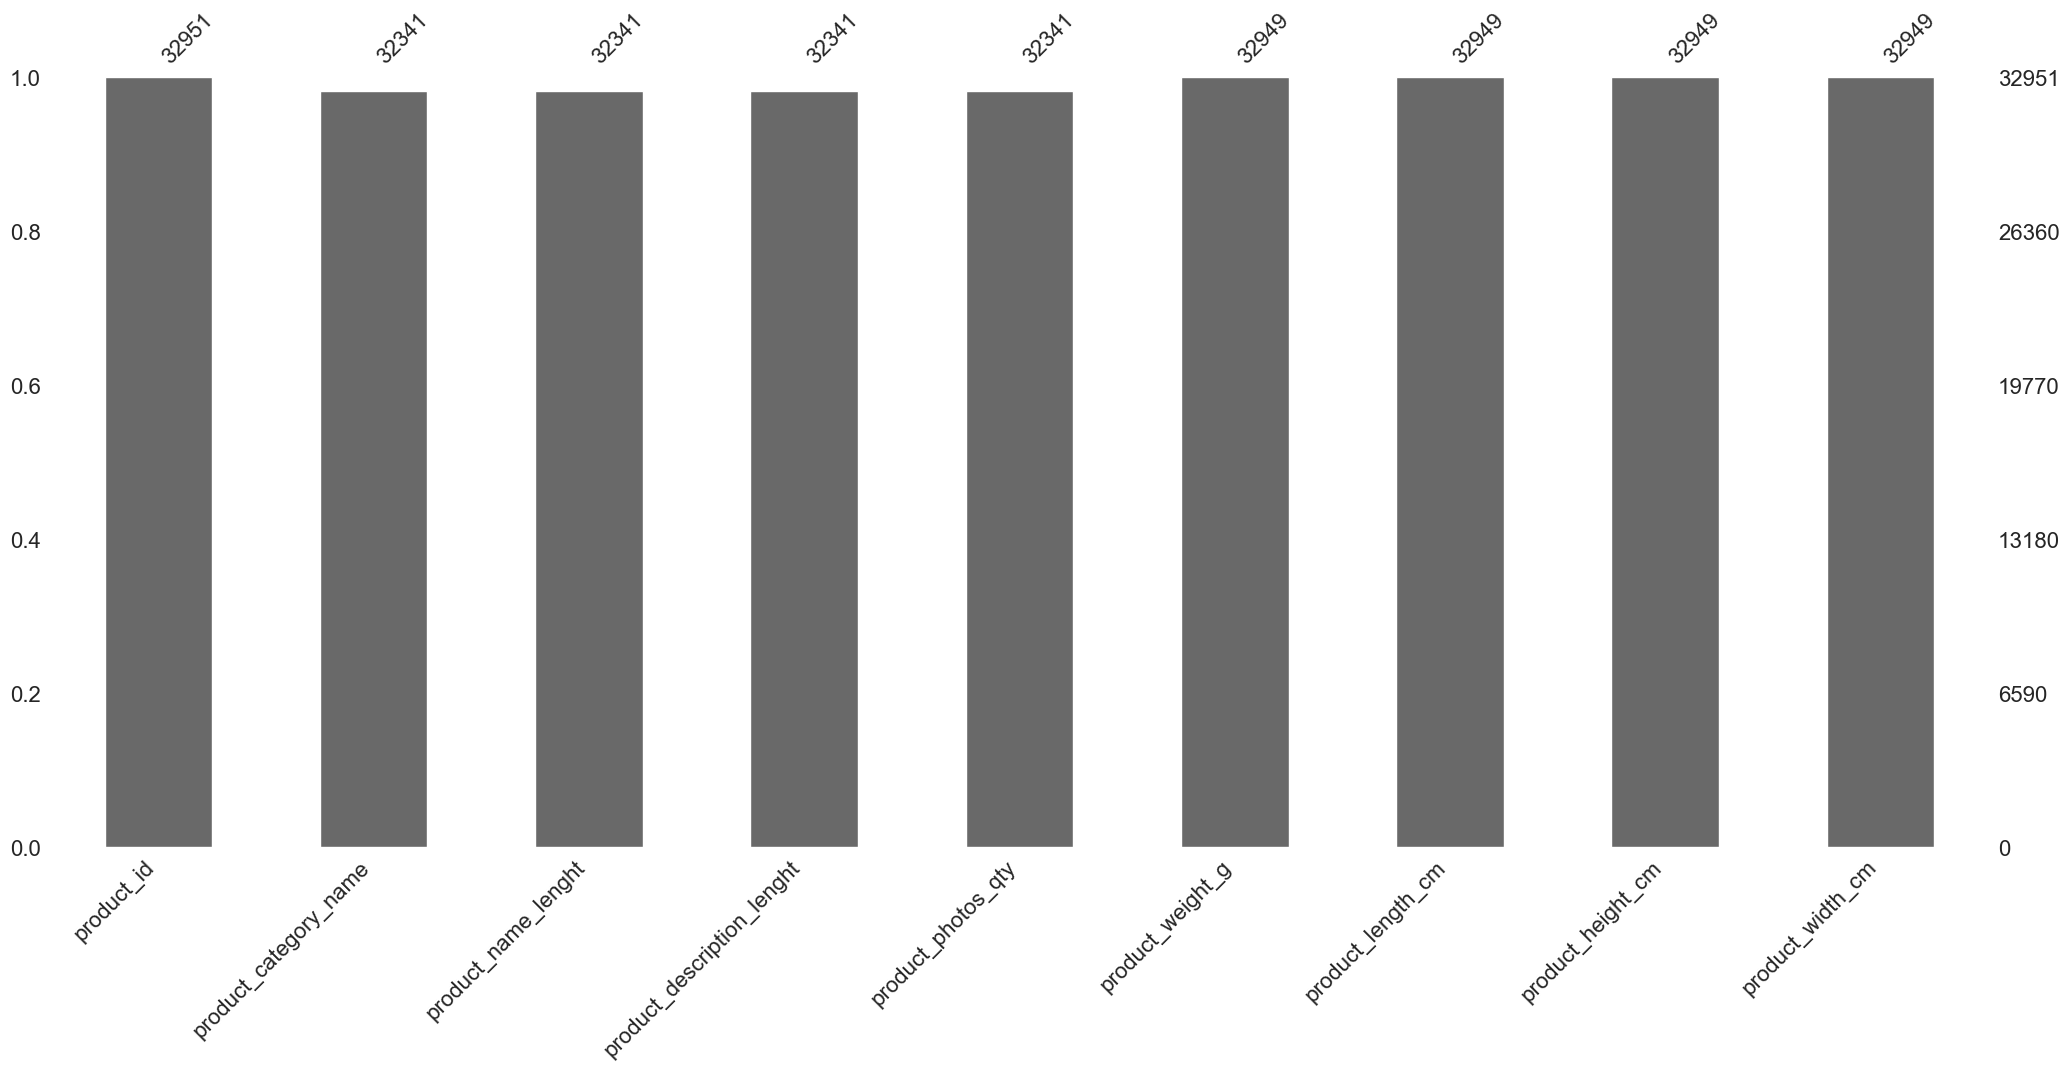

In [57]:
info_general(products)

In [58]:
# On va supprimer les colonnes qui ne sont pas necéssaires pour nos analyses
col_drop6 = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm",
]
df_products = products.drop(columns=col_drop6)
print(df_products.shape)
df_products.head(2)

(32951, 2)


,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes


In [59]:
# On vérifie les doublons
df_products.product_id.duplicated().sum()

0

### translation

In [60]:
translation.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [61]:
info_general(translation)

************************* * INFORMATIONS GENERALES DE NOTRE DATAFRAME * *************************
----------------------------------------------------------------------------------------------------

Il y a 71 lignes et 2 colonnes dans notre dataframe.
----------------------------------------------------------------------------------------------------
* On obtiens l'info sur notre dataframe * 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
----------------------------------------------------------------------------------------------------
* On obtient les i

,count,unique,top,freq
product_category_name,71,71,beleza_saude,1
product_category_name_english,71,71,health_beauty,1


----------------------------------------------------------------------------------------------------
*On vérifie s'il y a des doublons dans notre dataframe* 
** Il n'y a pas de doublons **
----------------------------------------------------------------------------------------------------
** On vérifie s'il y a des valeurs nulles et on display pourcentage des valeurs nulles par colonne en descendant **
----------------------------------------------------------------------------------------------------
** On a  0.0 % de valeur nulle dans notre dataframe **
----------------------------------------------------------------------------------------------------


In [62]:
# On vérifie les doublons
translation.product_category_name.duplicated().sum()

0

### sellers

In [63]:
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [64]:
# On va changer le nom de la colonne
sellers.rename(columns={"seller_zip_code_prefix": "zip_code_prefix"}, inplace=True)

In [65]:
info_general(sellers)

************************* * INFORMATIONS GENERALES DE NOTRE DATAFRAME * *************************
----------------------------------------------------------------------------------------------------

Il y a 3095 lignes et 4 colonnes dans notre dataframe.
----------------------------------------------------------------------------------------------------
* On obtiens l'info sur notre dataframe * 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   seller_id        3095 non-null   object
 1   zip_code_prefix  3095 non-null   int64 
 2   seller_city      3095 non-null   object
 3   seller_state     3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None
--------------------------------------------------------------------

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
seller_id,3095,3095,3442f8959a84dea7ee197c632cb2df15,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip_code_prefix,3095.0,NaN,NaN,NaN,32291.059451,32713.45383,1001.0,7093.5,14940.0,64552.5,99730.0
seller_city,3095,611,sao paulo,694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
seller_state,3095,23,SP,1849,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
*On vérifie s'il y a des doublons dans notre dataframe* 
** Il n'y a pas de doublons **
----------------------------------------------------------------------------------------------------
** On vérifie s'il y a des valeurs nulles et on display pourcentage des valeurs nulles par colonne en descendant **
----------------------------------------------------------------------------------------------------
** On a  0.0 % de valeur nulle dans notre dataframe **
----------------------------------------------------------------------------------------------------


Il y a  611 unique  seller_city dans notre data.


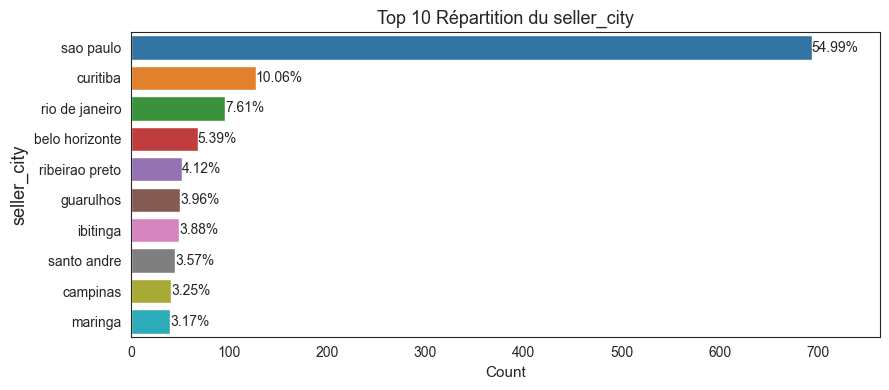

In [66]:
countplot_top10(sellers, "seller_city")

# <a name="C4"> 2.2 Les jointures des fichiers et imputation des valeurs manquantes</a>

<a href="#top">sommaire</a>

## On va faire les jointures entre les fichiers

### customers_geo

In [67]:
pd.merge(
    customers, df_geo, on="zip_code_prefix", how="left", indicator=True
)._merge.value_counts()

_merge
both          99163
left_only       278
right_only        0
Name: count, dtype: int64

In [68]:
customers_geo = pd.merge(customers, df_geo, on="zip_code_prefix", how="left")
customers_geo.rename(
    columns={"geolocation_lat": "customer_lat", "geolocation_lng": "customer_lng"},
    inplace=True,
)
customers_geo.drop(columns="zip_code_prefix", inplace=True)
print(customers_geo.shape)
customers_geo.head(2)

(99441, 6)


,customer_id,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,-20.509897,-47.397866
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,-23.726853,-46.545746


### product_english

In [69]:
translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [70]:
pd.merge(
    df_products, translation, on="product_category_name", how="left", indicator=True
)._merge.value_counts()

_merge
both          32328
left_only       623
right_only        0
Name: count, dtype: int64

In [71]:
product_english = pd.merge(
    df_products, translation, on="product_category_name", how="left"
)

In [72]:
product_english.drop(columns="product_category_name", inplace=True)
print(product_english.shape)
product_english.head(2)

(32951, 2)


,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art


In [73]:
product_english.isnull().mean()

product_id                       0.000000
product_category_name_english    0.018907
dtype: float64

In [74]:
# On va remplacer les valeurs manquantes par "unknown".
product_english["product_category_name_english"].fillna(value="unknown", inplace=True)

Il y a  72 unique  product_category_name_english dans notre data.


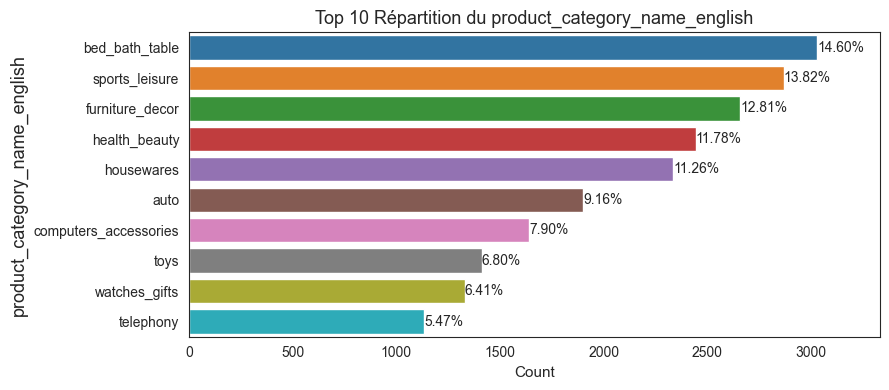

In [75]:
countplot_top10(product_english, "product_category_name_english")

### product_item

In [76]:
pd.merge(
    df_order_items, product_english, on="product_id", how="left", indicator=True
)._merge.value_counts()

_merge
both          112650
left_only          0
right_only         0
Name: count, dtype: int64

In [77]:
product_item = pd.merge(df_order_items, product_english, on="product_id", how="left")
print(product_item.shape)
product_item.head(2)

(112650, 6)


,order_id,order_item_id,product_id,seller_id,price,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.9,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.9,pet_shop


In [78]:
product_item.order_id.duplicated().sum()

13984

In [79]:
product_item.shape

(112650, 6)

In [80]:
# On va grouper les order_id

In [81]:
product_item_grouped = (
    product_item.groupby("order_id")
    .agg(
        {
            "product_id": "count",
            "price": "sum",
            "product_category_name_english": "nunique",
        }
    )
    .reset_index()
)
# On va changer le nom de la colonne
product_item_grouped.rename(
    columns={
        "product_id": "nb_product",
        "price": "price_sum",
        "product_category_name_english": "nb_product_categ",
    },
    inplace=True,
)
print(product_item_grouped.shape)
product_item_grouped.head(2)

(98666, 4)


,order_id,nb_product,price_sum,nb_product_categ
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.9,1
1,00018f77f2f0320c557190d7a144bdd3,1,239.9,1


In [82]:
product_item_grouped.nb_product.value_counts()

nb_product
1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
8         8
10        8
12        5
11        4
9         3
15        2
14        2
20        2
13        1
21        1
Name: count, dtype: int64

### order_prod

In [83]:
pd.merge(
    df_orders, product_item_grouped, on="order_id", how="left", indicator=True
)._merge.value_counts()

_merge
both          98666
left_only       775
right_only        0
Name: count, dtype: int64

In [84]:
order_prod = pd.merge(df_orders, product_item_grouped, on="order_id", how="left")
print(order_prod.shape)
order_prod.head(2)

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_product,price_sum,nb_product_categ
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,29.99,1.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1.0,118.70,1.0


In [85]:
order_prod.isnull().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_delivered_customer_date    0.029817
nb_product                       0.007794
price_sum                        0.007794
nb_product_categ                 0.007794
dtype: float64

In [86]:
# On va imputer les valeurs manquantes avec median de la colonne

cols2 = ["nb_product", "price_sum", "nb_product_categ"]
for col in cols2:
    order_prod[col].fillna(order_prod[col].median(), inplace=True)

In [87]:
order_prod.isnull().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_delivered_customer_date    0.029817
nb_product                       0.000000
price_sum                        0.000000
nb_product_categ                 0.000000
dtype: float64

### order_prod_custom

In [88]:
customers_geo.shape

(99441, 6)

In [89]:
pd.merge(
    order_prod, customers_geo, on="customer_id", how="left", indicator=True
)._merge.value_counts()

_merge
both          99441
left_only         0
right_only        0
Name: count, dtype: int64

In [90]:
order_prod_custom = pd.merge(order_prod, customers_geo, on="customer_id", how="inner")
print(order_prod_custom.shape)
order_prod_custom.head(2)

(99441, 13)


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_product,price_sum,nb_product_categ,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.574809,-46.587471
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1.0,118.70,1.0,af07308b275d755c9edb36a90c618231,barreiras,BA,-12.169860,-44.988369


### order_prod_custom_payments

In [91]:
pd.merge(
    order_prod_custom,
    orders_payments_grouped,
    on="order_id",
    how="left",
    indicator=True,
)._merge.value_counts()

_merge
both          99440
left_only         1
right_only        0
Name: count, dtype: int64

In [92]:
merge_left = pd.merge(
    order_prod_custom,
    orders_payments_grouped,
    on="order_id",
    how="left",
    indicator=True,
)
merge_left[merge_left._merge == "left_only"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_product,price_sum,nb_product_categ,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng,payment_sequential_max,payment_type_num,payment_value_sum,_merge
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-09 07:47:38,3.0,134.97,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.581177,-47.858931,NaN,NaN,NaN,left_only


In [93]:
merge_left[merge_left.customer_id == "86dc2ffce2dfff336de2f386a786e574"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_product,price_sum,nb_product_categ,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng,payment_sequential_max,payment_type_num,payment_value_sum,_merge
30710,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-11-09 07:47:38,3.0,134.97,1.0,830d5b7aaa3b6f1e9ad63703bec97d23,sao joaquim da barra,SP,-20.581177,-47.858931,NaN,NaN,NaN,left_only


In [94]:
merge_left.order_purchase_timestamp.min()

'2016-09-04 21:15:19'

Juste dix jours après le lancement du site internet, une anomalie s'est produite. Nous ne connaissons pas le type et le montant d'un paiement, mais il s'agit d'un cas exceptionnel.

In [95]:
order_prod_custom_payments = pd.merge(
    order_prod_custom, orders_payments_grouped, on="order_id", how="inner"
)
print(order_prod_custom_payments.shape)
order_prod_custom_payments.head(2)

(99440, 16)


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_product,price_sum,nb_product_categ,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng,payment_sequential_max,payment_type_num,payment_value_sum
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.574809,-46.587471,3,2,38.71
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1.0,118.70,1.0,af07308b275d755c9edb36a90c618231,barreiras,BA,-12.169860,-44.988369,1,1,141.46


### order_prod_custom_payments_reviews

In [96]:
pd.merge(
    order_prod_custom_payments,
    df_reviews_grouped,
    on="order_id",
    how="left",
    indicator=True,
)._merge.value_counts()

_merge
both          98672
left_only       768
right_only        0
Name: count, dtype: int64

In [97]:
order_prod_custom_payments_reviews = pd.merge(
    order_prod_custom_payments, df_reviews_grouped, on="order_id", how="left"
)
print(order_prod_custom_payments_reviews.shape)
order_prod_custom_payments_reviews.head(2)

(99440, 17)


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_product,price_sum,nb_product_categ,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng,payment_sequential_max,payment_type_num,payment_value_sum,review_score_mean
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.574809,-46.587471,3,2,38.71,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1.0,118.70,1.0,af07308b275d755c9edb36a90c618231,barreiras,BA,-12.169860,-44.988369,1,1,141.46,4.0


In [98]:
order_prod_custom_payments_reviews.isnull().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_delivered_customer_date    0.029817
nb_product                       0.000000
price_sum                        0.000000
nb_product_categ                 0.000000
customer_unique_id               0.000000
customer_city                    0.000000
customer_state                   0.000000
customer_lat                     0.002796
customer_lng                     0.002796
payment_sequential_max           0.000000
payment_type_num                 0.000000
payment_value_sum                0.000000
review_score_mean                0.007723
dtype: float64

In [99]:
# On va imputer les valeurs manquantes avec moyenne de la colonne
order_prod_custom_payments_reviews["review_score_mean"].fillna(
    order_prod_custom_payments_reviews["review_score_mean"].mean(), inplace=True
)

# Les analyses exploratoires

# <a name="C5"> 3.1 Analyse Univarié</a>

<a href="#top">sommaire</a>

In [100]:
df_analyse = order_prod_custom_payments_reviews.copy()

************************* * INFORMATIONS GENERALES DE NOTRE DATAFRAME * *************************
----------------------------------------------------------------------------------------------------

Il y a 99440 lignes et 17 colonnes dans notre dataframe.
----------------------------------------------------------------------------------------------------
* On obtiens l'info sur notre dataframe * 
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99440 entries, 0 to 99439
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99440 non-null  object 
 1   customer_id                    99440 non-null  object 
 2   order_status                   99440 non-null  object 
 3   order_purchase_timestamp       99440 non-null  object 
 4   order_delivered_customer

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,99440,99440,e481f51cbdc54678b7cc49136f2d6af7,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,99440,99440,9ef432eb6251297304e76186b10a928d,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_status,99440,8,delivered,96477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_purchase_timestamp,99440,98874,2018-02-19 15:37:47,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_delivered_customer_date,96475,95663,2018-07-24 21:36:42,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nb_product,99440.0,NaN,NaN,NaN,1.140607,0.536465,1.0,1.0,1.0,1.0,21.0
price_sum,99440.0,NaN,NaN,NaN,137.357766,209.871398,0.85,45.99,86.9,149.9,13440.0
nb_product_categ,99440.0,NaN,NaN,NaN,1.008085,0.091553,1.0,1.0,1.0,1.0,3.0
customer_unique_id,99440,96095,8d50f5eadf50201ccdcedfb9e2ac8455,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_city,99440,4119,sao paulo,15540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


----------------------------------------------------------------------------------------------------
*On vérifie s'il y a des doublons dans notre dataframe* 
** Il n'y a pas de doublons **
----------------------------------------------------------------------------------------------------
** On vérifie s'il y a des valeurs nulles et on display pourcentage des valeurs nulles par colonne en descendant **
----------------------------------------------------------------------------------------------------
** On a  0.21 % de valeur nulle dans notre dataframe **


,nombre_null,pourcentage_null
order_delivered_customer_date,2965,2.98
customer_lng,278,0.28
customer_lat,278,0.28
order_id,0,0.00
customer_city,0,0.00
payment_value_sum,0,0.00
payment_type_num,0,0.00
payment_sequential_max,0,0.00
customer_state,0,0.00
customer_unique_id,0,0.00


** Visualisation des valeurs nulles ** 
----------------------------------------------------------------------------------------------------


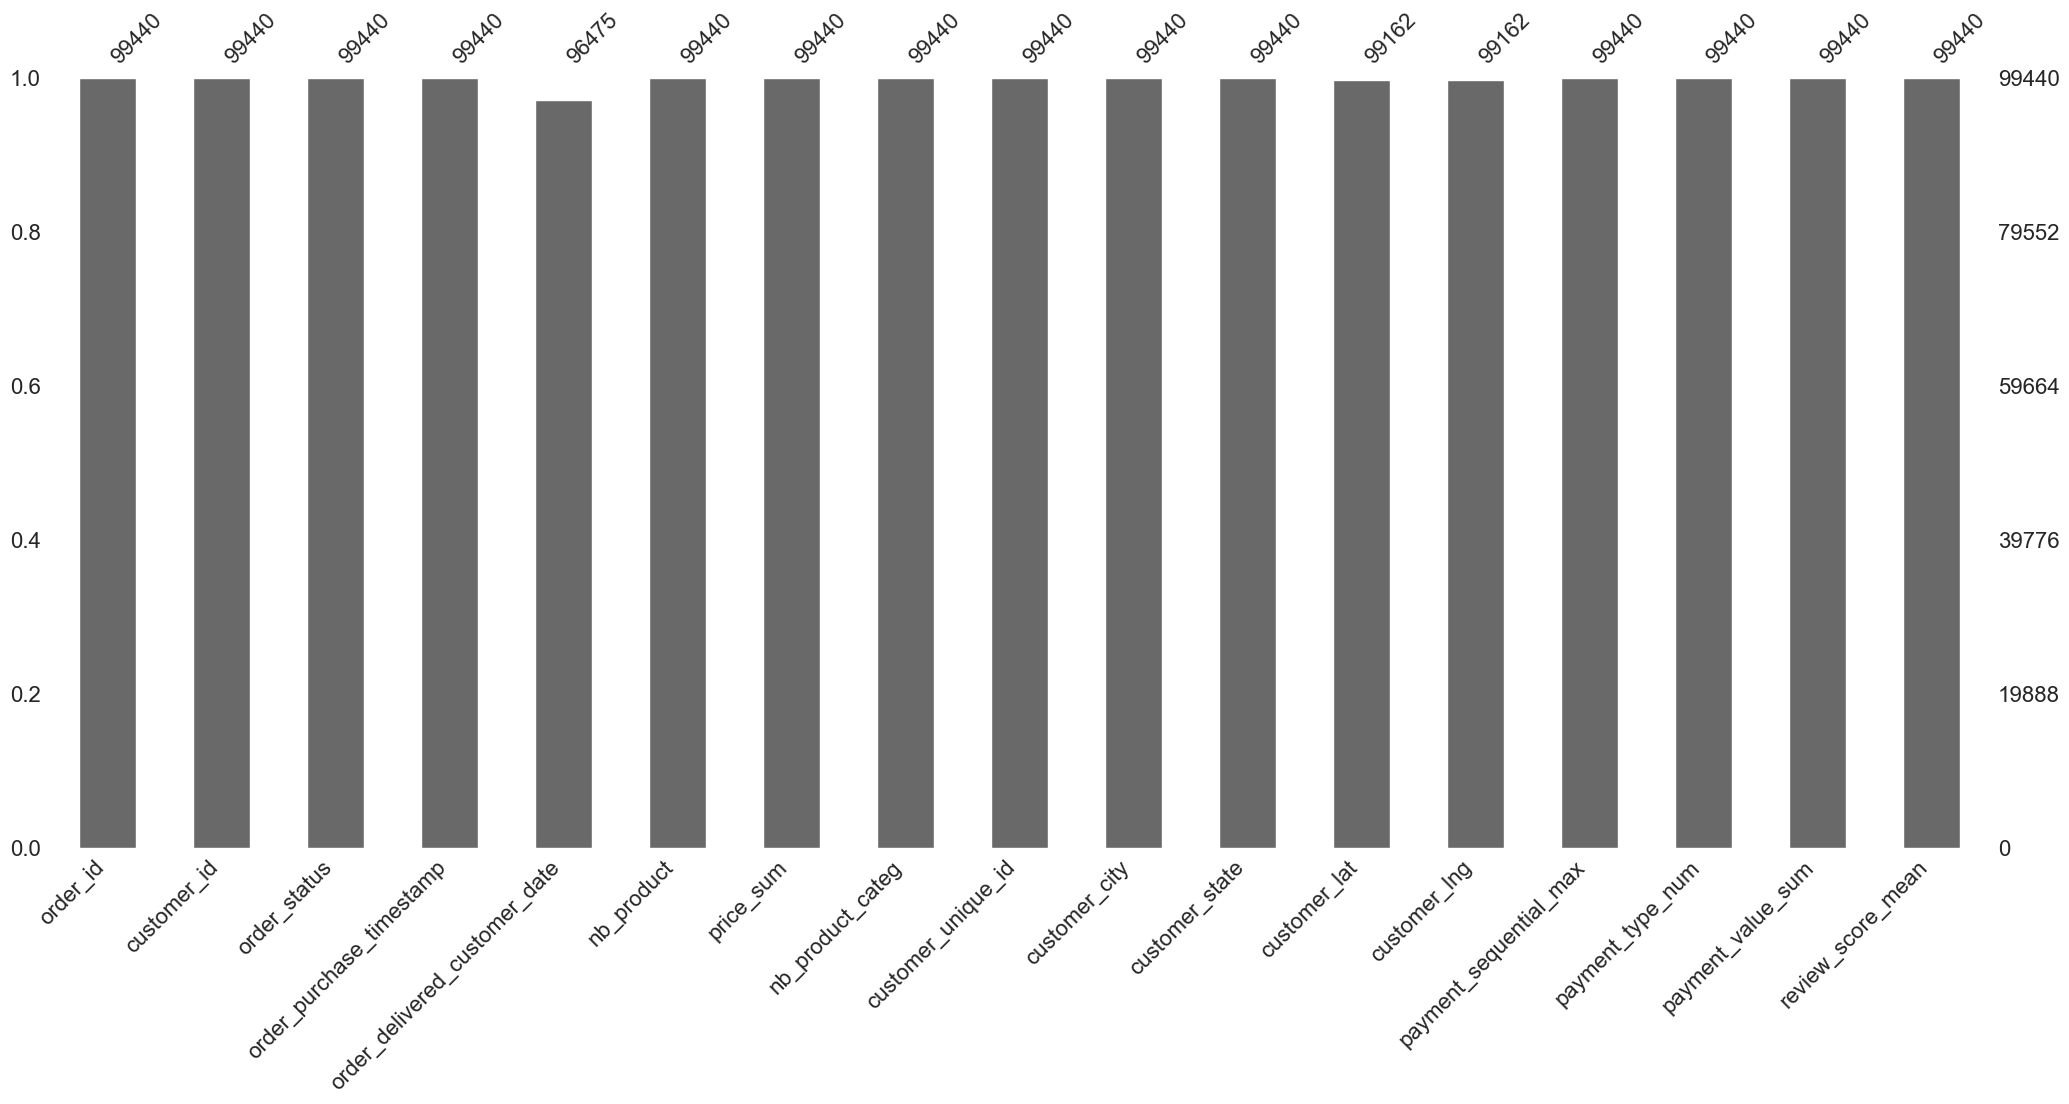

In [101]:
info_general(df_analyse)

In [102]:
df_analyse.describe()

,nb_product,price_sum,nb_product_categ,customer_lat,customer_lng,payment_sequential_max,payment_type_num,payment_value_sum,review_score_mean
count,99440.000000,99440.000000,99440.000000,99162.000000,99162.000000,99440.000000,99440.000000,99440.000000,99440.000000
mean,1.140607,137.357766,1.008085,-21.192936,-46.176173,1.045515,1.022586,160.990267,4.086825
std,0.536465,209.871398,0.091553,5.620612,4.066219,0.382177,0.148582,221.951257,1.341036
min,1.000000,0.850000,1.000000,-36.605374,-72.666706,1.000000,1.000000,0.000000,1.000000
25%,1.000000,45.990000,1.000000,-23.588296,-48.096863,1.000000,1.000000,62.010000,4.000000
50%,1.000000,86.900000,1.000000,-22.926905,-46.630754,1.000000,1.000000,105.290000,5.000000
75%,1.000000,149.900000,1.000000,-20.146615,-43.602775,1.000000,1.000000,176.970000,5.000000
max,21.000000,13440.000000,3.000000,42.184003,-8.577855,29.000000,2.000000,13664.080000,5.000000


In [103]:
# On convertit les types des colonnes en datetime
date_cols = ["order_purchase_timestamp", "order_delivered_customer_date"]
df_analyse[date_cols] = df_analyse[date_cols].apply(pd.to_datetime)

In [104]:
# On crée les colonnes année, mois et jour de la semaine.
df_analyse["order_year"] = df_analyse["order_purchase_timestamp"].dt.year
df_analyse["order_month"] = df_analyse["order_purchase_timestamp"].dt.month_name()
df_analyse["order_day"] = df_analyse["order_purchase_timestamp"].dt.day_name()

In [105]:
df_analyse["order_day"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Saturday', 'Sunday', 'Thursday',
       'Friday'], dtype=object)

In [106]:
print(df_analyse.shape)
df_analyse.head(2)

(99440, 20)


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_product,price_sum,nb_product_categ,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng,payment_sequential_max,payment_type_num,payment_value_sum,review_score_mean,order_year,order_month,order_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.574809,-46.587471,3,2,38.71,4.0,2017,October,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1.0,118.70,1.0,af07308b275d755c9edb36a90c618231,barreiras,BA,-12.169860,-44.988369,1,1,141.46,4.0,2018,July,Tuesday


Il y a  8 unique  order_status dans notre data.


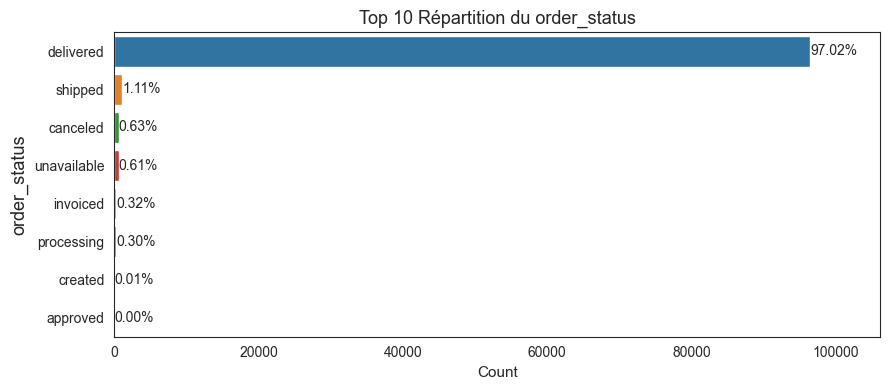

In [107]:
countplot_top10(df_analyse, "order_status")

In [108]:
# La plupart des commandes ont été livrées.

Il y a  4119 unique  customer_city dans notre data.


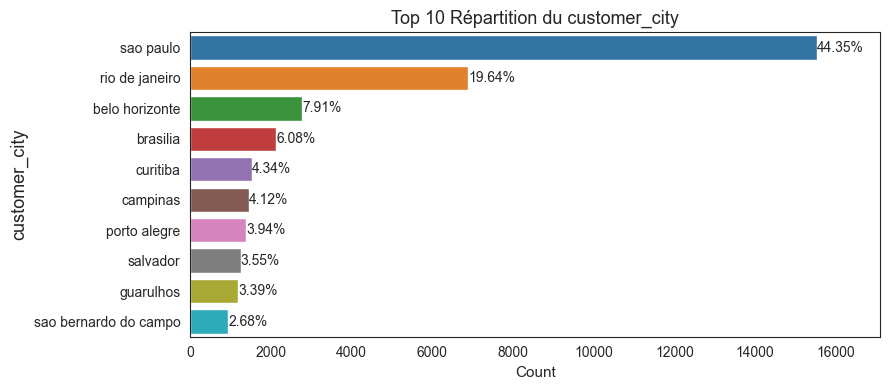

In [109]:
countplot_top10(df_analyse, "customer_city")

In [110]:
# La plupart des clients se situent sur la côte

Il y a  27 unique  customer_state dans notre data.


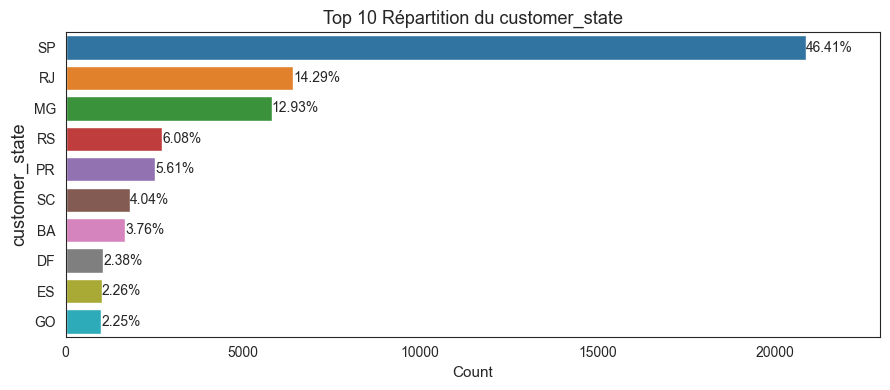

In [111]:
countplot_top10(df_analyse, "customer_state")

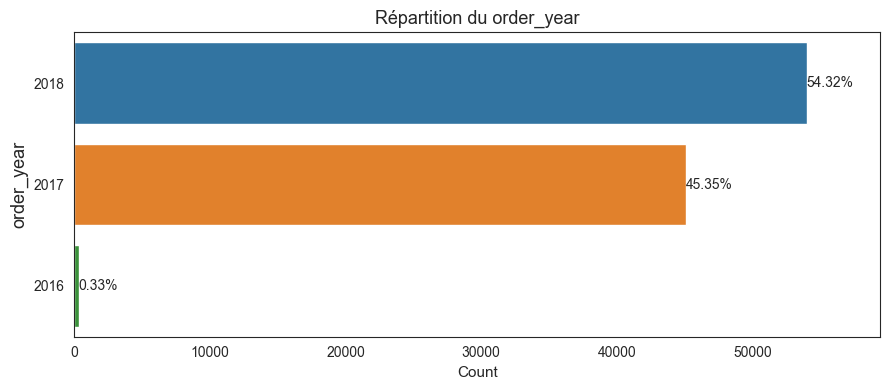

In [112]:
countplot(df_analyse, "order_year")

In [113]:
# La plupart des commandes ont été effectuées  pendant les années 2018 et 2017

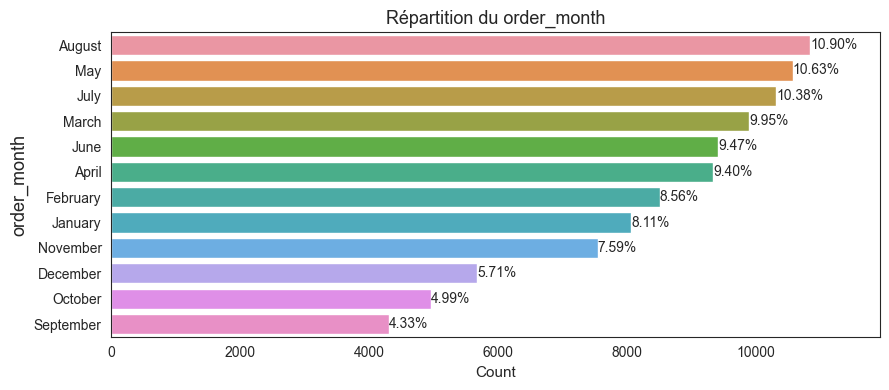

In [114]:
countplot(df_analyse, "order_month")

In [115]:
# La plupart des commandes ont été effectuées  pendant les mois de l’été

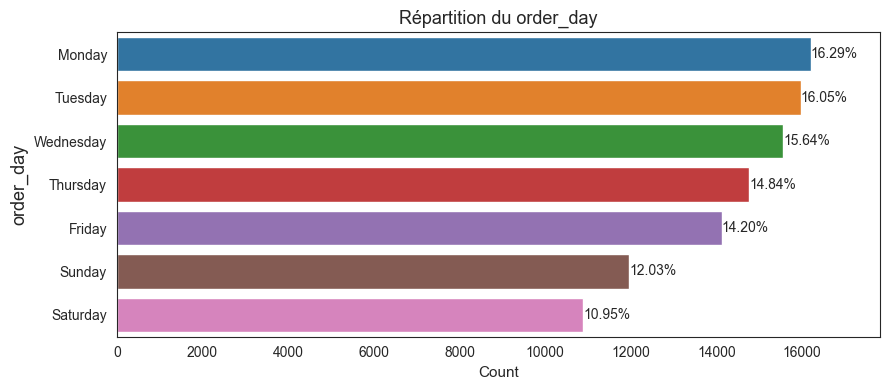

In [116]:
countplot(df_analyse, "order_day")

In [117]:
# La plupart des commandes ont été effectuées  pendant la semaine 

In [118]:
df_analyse.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_product,price_sum,nb_product_categ,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng,payment_sequential_max,payment_type_num,payment_value_sum,review_score_mean,order_year,order_month,order_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.574809,-46.587471,3,2,38.71,4.0,2017,October,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1.0,118.70,1.0,af07308b275d755c9edb36a90c618231,barreiras,BA,-12.169860,-44.988369,1,1,141.46,4.0,2018,July,Tuesday


In [119]:
df_analyse.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
nb_product                              float64
price_sum                               float64
nb_product_categ                        float64
customer_unique_id                       object
customer_city                            object
customer_state                           object
customer_lat                            float64
customer_lng                            float64
payment_sequential_max                    int64
payment_type_num                          int64
payment_value_sum                       float64
review_score_mean                       float64
order_year                                int32
order_month                              object
order_day                                object
dtype: object

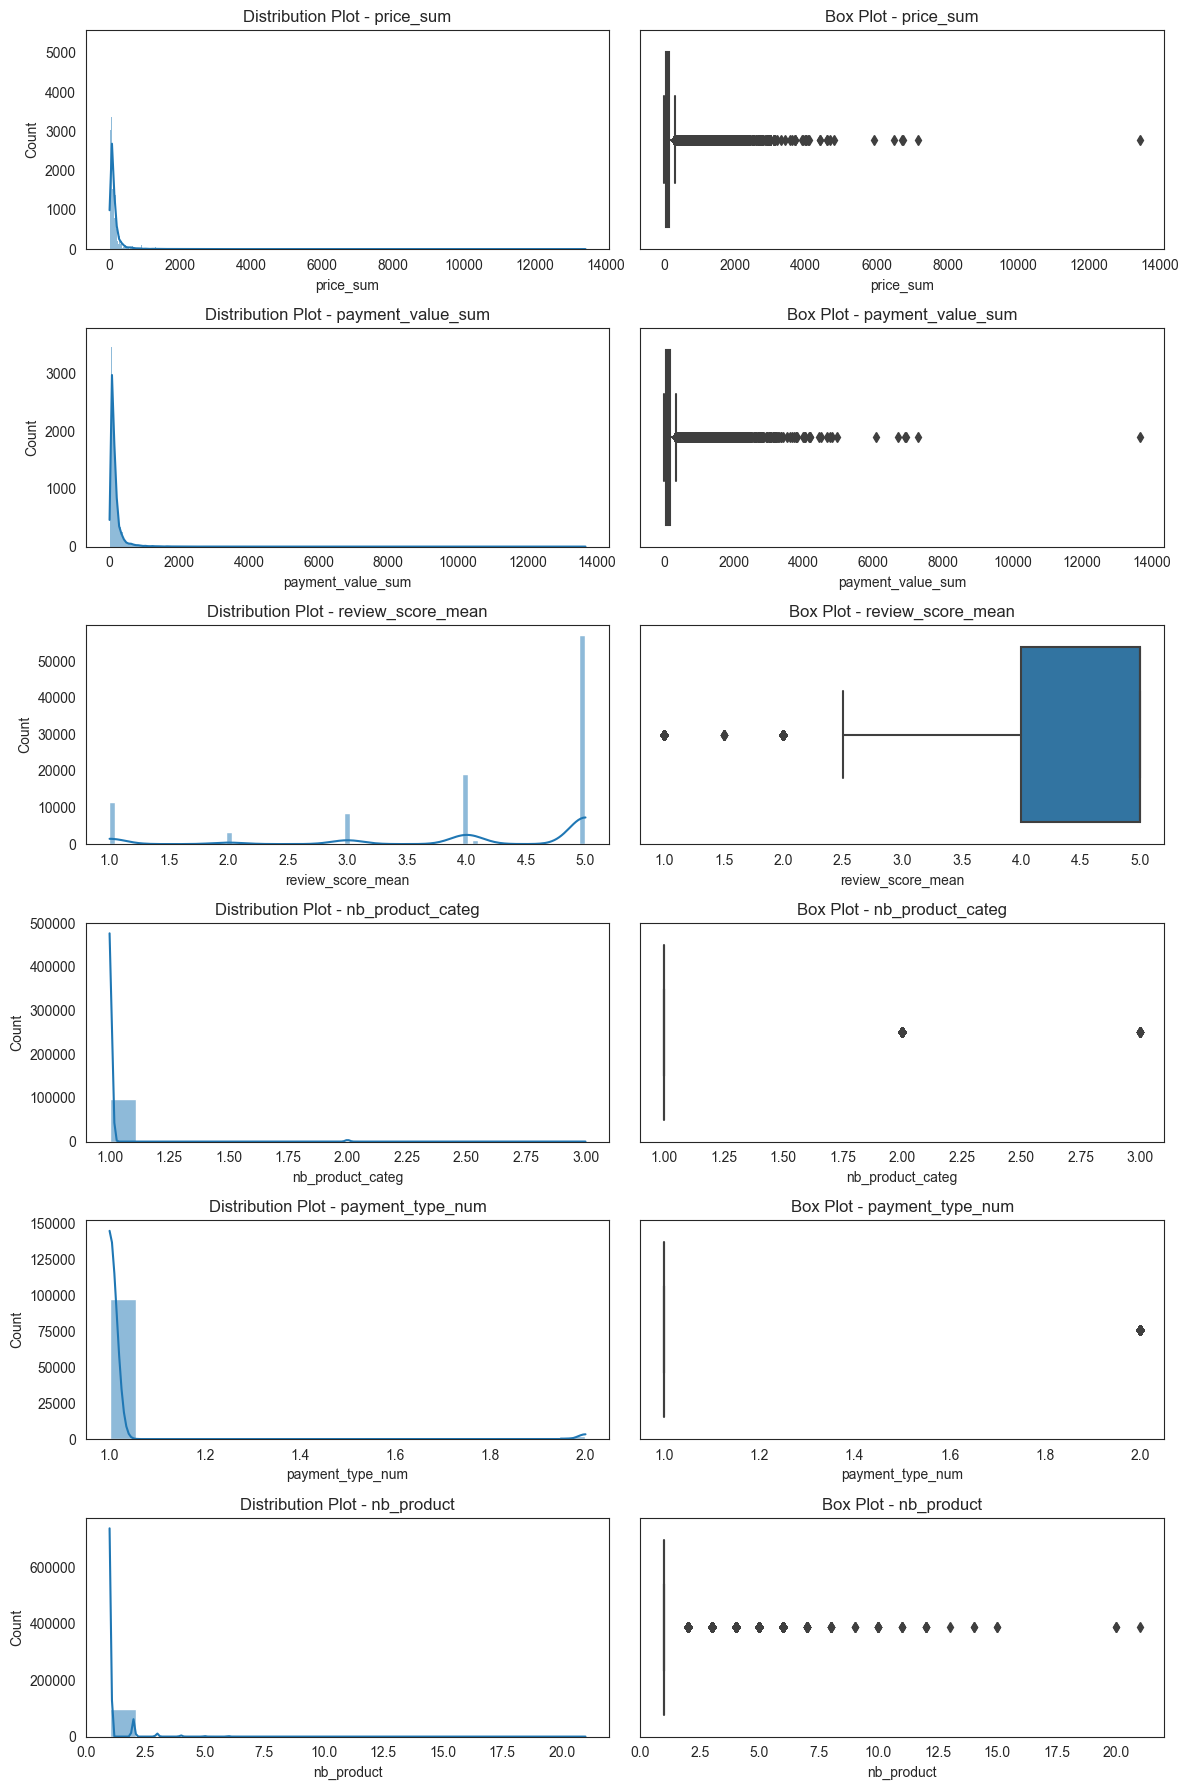

In [120]:
# columns = df_analyse.select_dtypes(include=["number"]).columns.tolist()
cols_num = [
    "price_sum",
    "payment_value_sum",
    "review_score_mean",
    "nb_product_categ",
    "payment_type_num",
    "nb_product",
]
distplot_and_boxplot(df_analyse, cols_num)

Seuls 25% des clients ont fait une commande depuis cinq mois.(moyen 287 jours)

Le client le plus actif a fait 17 fois de commande

Le moyen de montant total des achats est d'environ 165 réal brésilien

Le plupart des clients sont satisfaits

La durée moyenne de livraison est de 12 jours


In [121]:
df_analyse.shape

(99440, 20)

# <a name="C6"> 3.2 Analyse Bivarié</a>

<a href="#top">sommaire</a>

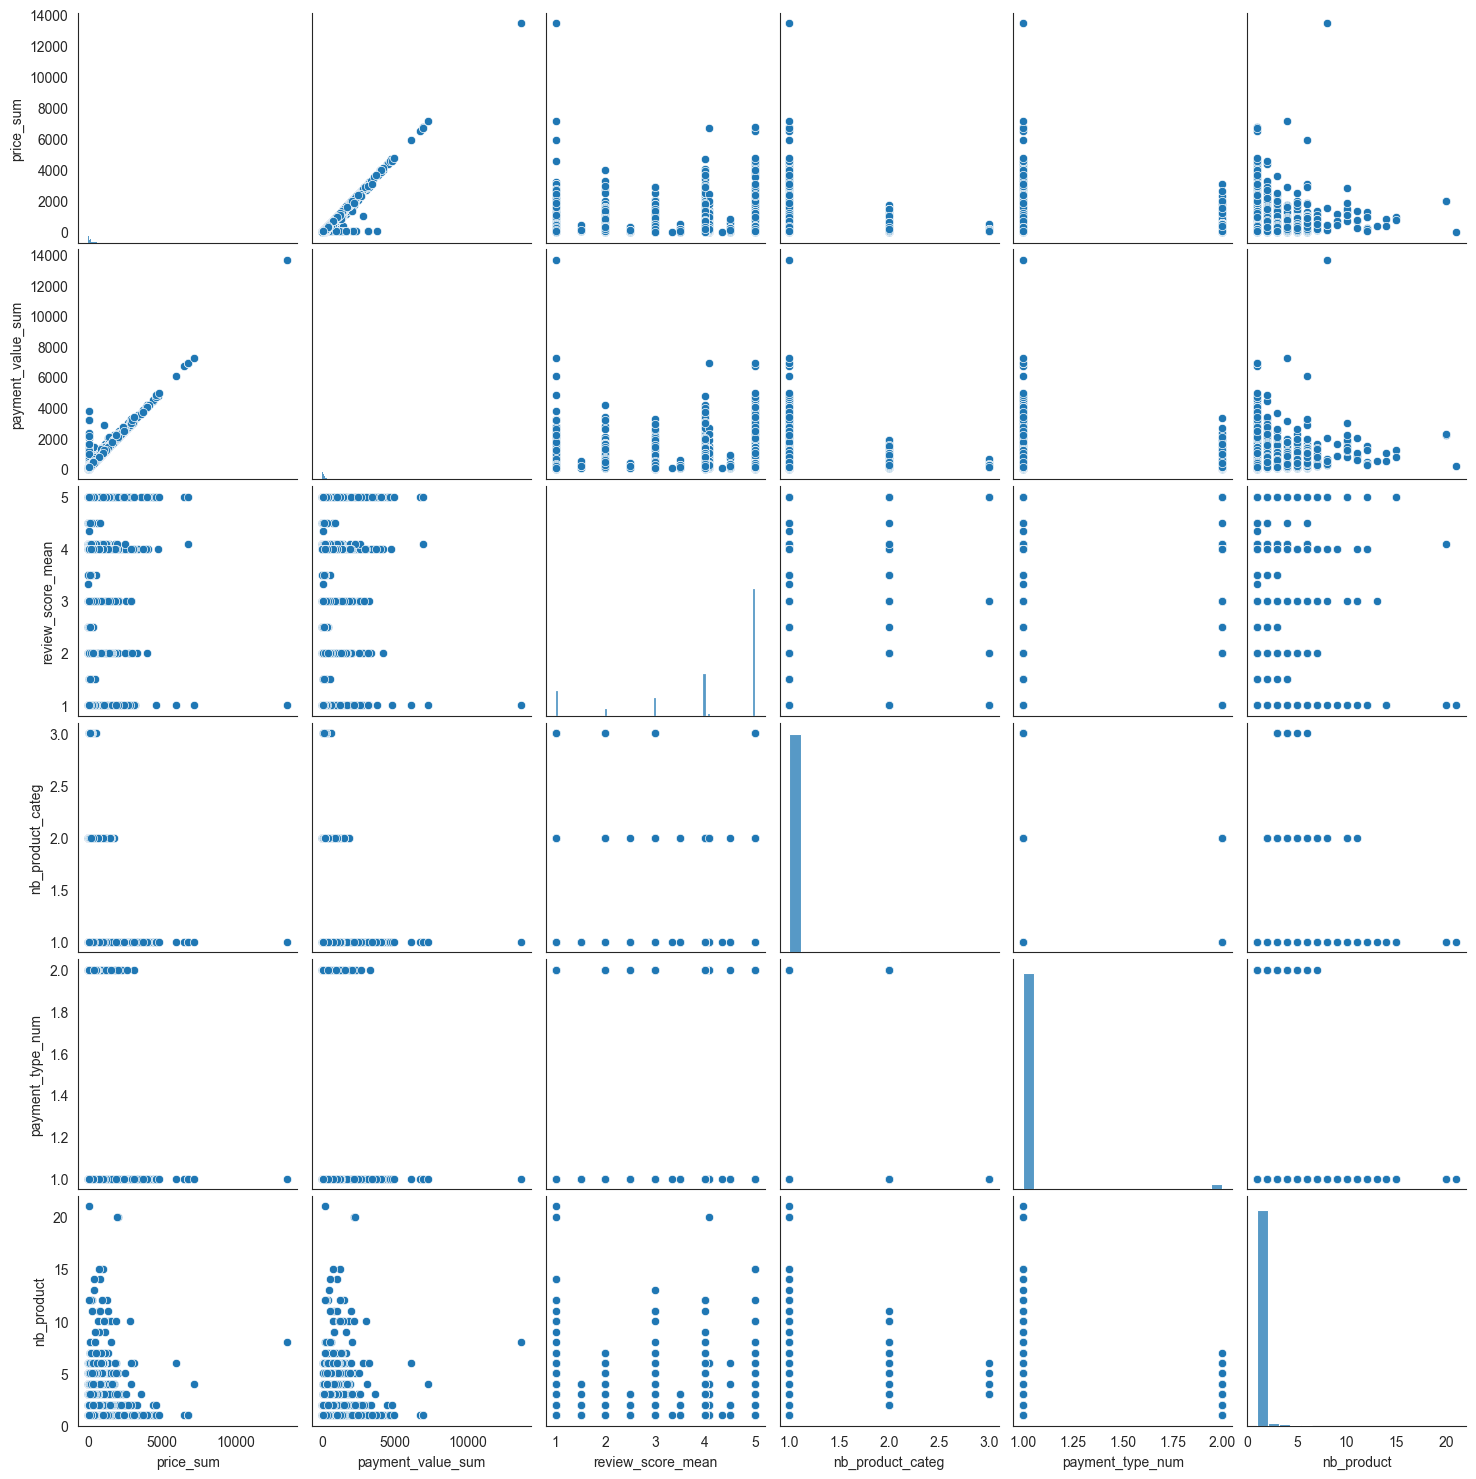

In [122]:
sns.pairplot(df_analyse[cols_num]);

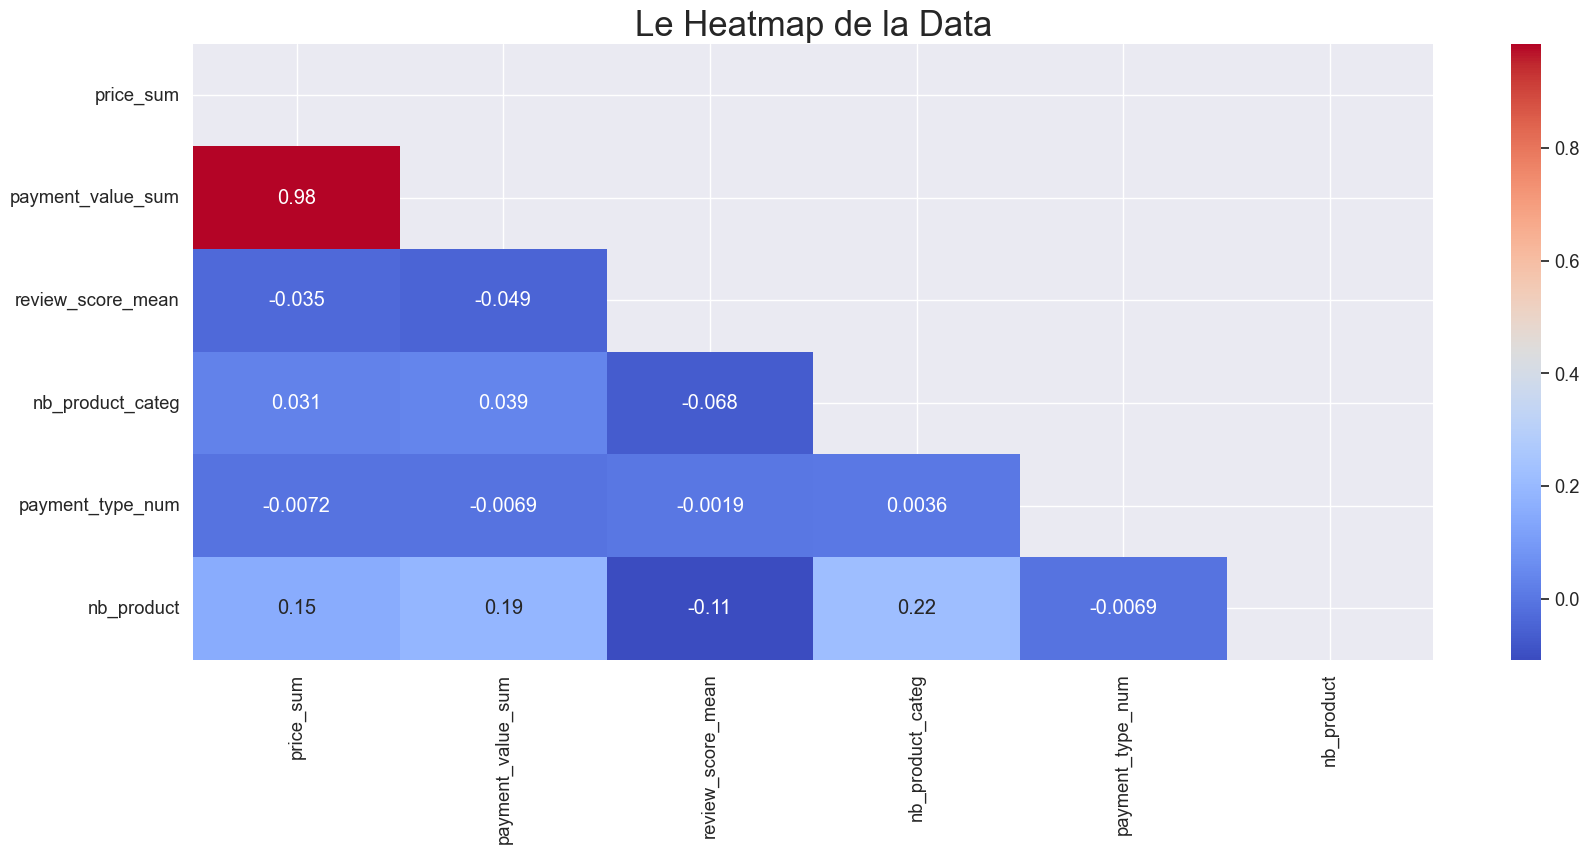

In [123]:
heatmap(df_analyse[cols_num])

Comme la plupart des clients ont effectué une seule commande, il y a une forte corrélation entre le prix total et la valeur totale des paiements.

In [124]:
print("Date du dernier achat", df_analyse["order_purchase_timestamp"].max())
print("Date du premier achat", df_analyse["order_purchase_timestamp"].min())

Date du dernier achat 2018-10-17 17:30:18
Date du premier achat 2016-09-04 21:15:19


In [125]:
df_analyse.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_product,price_sum,nb_product_categ,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng,payment_sequential_max,payment_type_num,payment_value_sum,review_score_mean,order_year,order_month,order_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.574809,-46.587471,3,2,38.71,4.0,2017,October,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1.0,118.70,1.0,af07308b275d755c9edb36a90c618231,barreiras,BA,-12.169860,-44.988369,1,1,141.46,4.0,2018,July,Tuesday


In [126]:
df_analyse[df_analyse.order_purchase_timestamp > "2018-9-03"]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_product,price_sum,nb_product_categ,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng,payment_sequential_max,payment_type_num,payment_value_sum,review_score_mean,order_year,order_month,order_day
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,1.0,86.9,1.0,08642cd329066fe11ec63293f714f2f8,santa luzia,MG,-19.784077,-43.929641,1,1,191.46,2.000000,2018,September,Thursday
5149,ea844c92cf978ea23321fa7fe5871761,6ddc45ad08e6a2c885ca2255fc52d6df,canceled,2018-09-13 09:56:12,NaT,1.0,86.9,1.0,c1ee153508c6b785b491443a95ff364e,mafra,SC,-26.119907,-49.803153,1,1,414.04,1.000000,2018,September,Thursday
9976,87ae60ef8b08ae0e5f903cacb53a6904,fea4d57ed3a45455f89c25ef3dae8ee8,canceled,2018-09-11 16:45:54,NaT,1.0,86.9,1.0,09687a7b7431a93b5c53b50ba779bf94,taubate,SP,-23.028580,-45.557884,1,1,258.67,1.000000,2018,September,Tuesday
16366,bd35b677fd239386e9861d11ae98ab56,ad2eb5d02c0808bcd8743117f6383cf6,canceled,2018-09-17 17:21:16,NaT,1.0,86.9,1.0,ef0103e9602d12594d19c2b666219bc1,belo horizonte,MG,-19.902939,-43.988673,1,1,84.58,2.000000,2018,September,Monday
20778,4d59cc2a2e7bb6c0a851725f5888a9b5,ead83a4f8f7be8c3034b2e98754a6147,canceled,2018-09-06 14:50:07,NaT,1.0,86.9,1.0,230a1e9f42924d41f37fd22a1d4a9707,santana de parnaiba,SP,-23.460000,-46.879734,1,1,69.46,5.000000,2018,September,Thursday
24410,0d3adebce4bebc1f80a7f36e9833f497,a7c87c25dbdded68c26c640582cb5ddb,canceled,2018-09-03 18:40:50,NaT,1.0,86.9,1.0,ba84da8c159659f116329563a0a981dd,petropolis,RJ,-22.531352,-43.172597,1,1,94.63,1.000000,2018,September,Monday
31169,21a00b08cbeb5716bbb66105e3dbd850,002b5342c72978cf0aba6aae1f5d5293,canceled,2018-09-10 17:51:25,NaT,1.0,86.9,1.0,76e5f3bca2b1f5c510c41563c2ea31a4,rio de janeiro,RJ,-22.972957,-43.397063,1,1,51.17,1.000000,2018,September,Monday
31890,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,1.0,86.9,1.0,af5454198a97379394cacf676e1e96cb,registro,SP,-24.492030,-47.834131,1,1,197.55,1.000000,2018,October,Wednesday
33978,5aac76cf7b07dd06fa4d50bf461d2f40,7a8a02e54cf3472df427e927f8b9c046,canceled,2018-09-25 11:59:18,NaT,1.0,86.9,1.0,9c3af16efacb7aa06aa3bc674556c5d6,belo horizonte,MG,-19.924492,-43.947040,1,1,221.54,1.000000,2018,September,Tuesday
37002,869997fbe01f39d184956b5c6bccfdbe,55c9dad94ec1a2ba57998bdb376c230a,canceled,2018-09-26 08:40:15,NaT,1.0,86.9,1.0,ba84da8c159659f116329563a0a981dd,petropolis,RJ,-22.531352,-43.172597,1,1,94.63,1.000000,2018,September,Wednesday


In [127]:
# Dans le dernier mois de dataset presque toutes les commandes ont été annulées

## L’évolution du Chiffre d'Affaire dans le temps par mois 

In [128]:
df_analyse["date_month"] = df_analyse["order_purchase_timestamp"].dt.strftime("%Y-%m")
df_analyse["date_month"] = pd.to_datetime(df_analyse["date_month"])
df_analyse.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,nb_product,price_sum,nb_product_categ,customer_unique_id,customer_city,customer_state,customer_lat,customer_lng,payment_sequential_max,payment_type_num,payment_value_sum,review_score_mean,order_year,order_month,order_day,date_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,1.0,29.99,1.0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.574809,-46.587471,3,2,38.71,4.0,2017,October,Monday,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,1.0,118.70,1.0,af07308b275d755c9edb36a90c618231,barreiras,BA,-12.169860,-44.988369,1,1,141.46,4.0,2018,July,Tuesday,2018-07-01


In [129]:
# Ca total par mois
ca_mois = df_analyse.groupby("date_month")["payment_value_sum"].sum()
ca_mois

date_month
2016-09-01        252.24
2016-10-01      59090.48
2016-12-01         19.62
2017-01-01     138488.04
2017-02-01     291908.01
2017-03-01     449863.60
2017-04-01     417788.03
2017-05-01     592918.82
2017-06-01     511276.38
2017-07-01     592382.92
2017-08-01     674396.32
2017-09-01     727762.45
2017-10-01     779677.88
2017-11-01    1194882.80
2017-12-01     878401.48
2018-01-01    1115004.18
2018-02-01     992463.34
2018-03-01    1159652.12
2018-04-01    1160785.48
2018-05-01    1153982.15
2018-06-01    1023880.50
2018-07-01    1066540.75
2018-08-01    1022425.32
2018-09-01       4439.54
2018-10-01        589.67
Name: payment_value_sum, dtype: float64

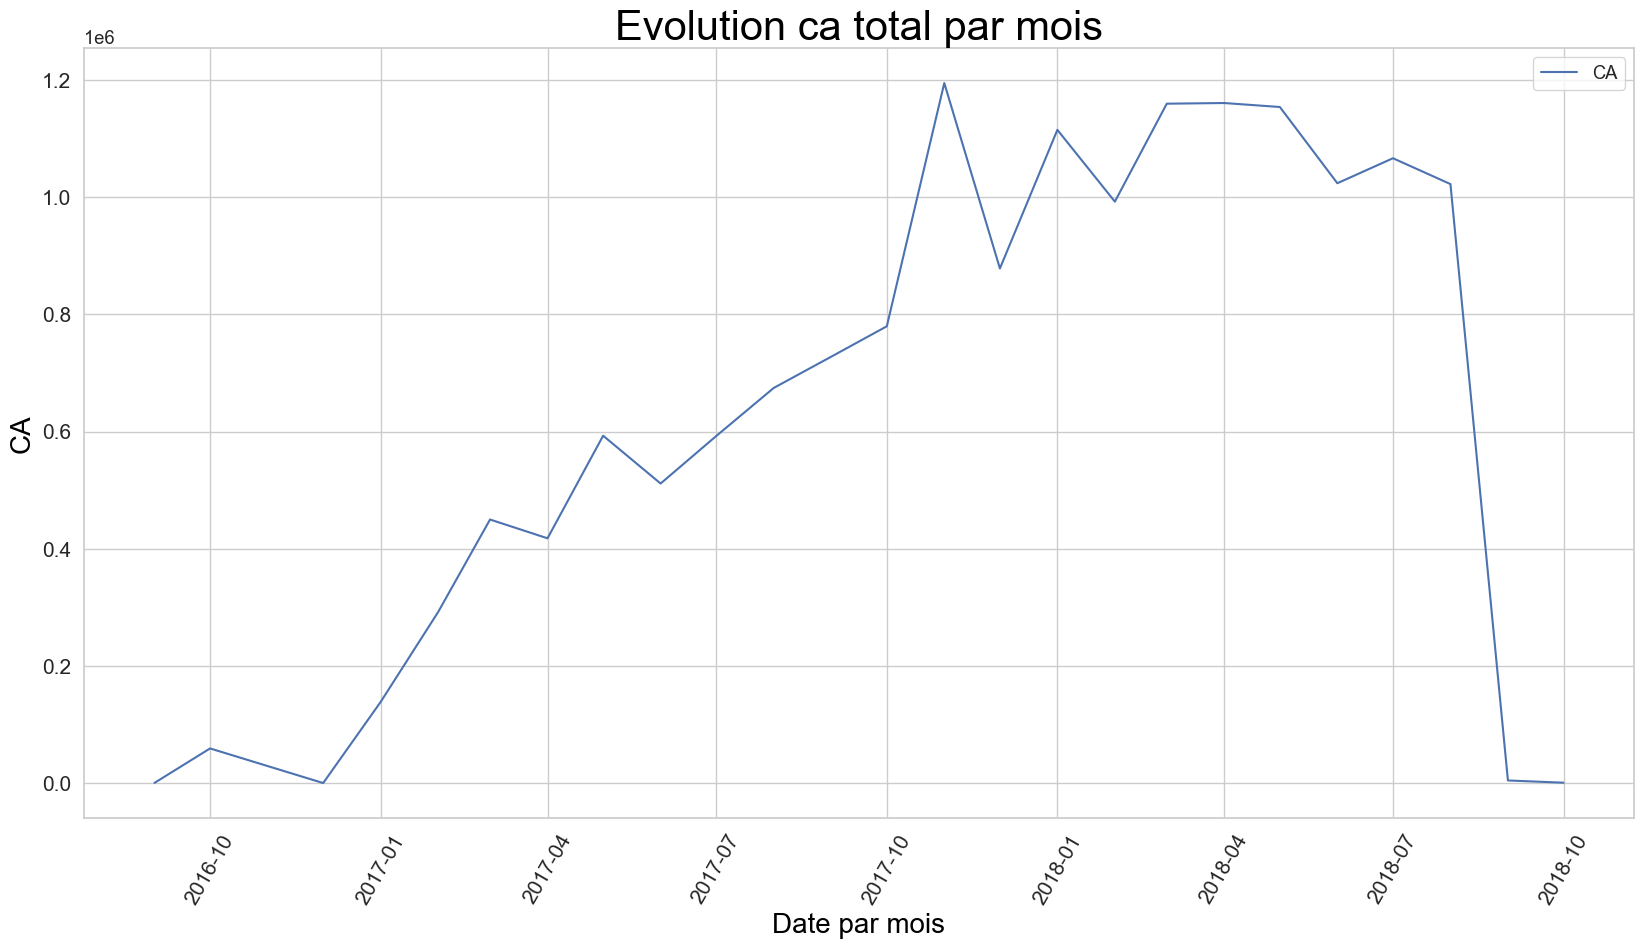

In [130]:
data = ca_mois
sns.set_style("whitegrid")
font1 = {"color": "black", "size": 30}
font2 = {"color": "black", "size": 20}
plt.figure(figsize=(20, 10))
plt.title("Evolution ca total par mois", fontdict=font1)
plt.xlabel("Date par mois", fontdict=font2)
plt.ylabel("CA", fontdict=font2)
plt.xticks(rotation=60, size=15)
plt.yticks(size=15)
sns.lineplot(data=data, x=data.index, y=data.values, label="CA");

In [131]:
# On a plus de chiffre d’affaire pendant l’année 2018

## Une décomposition de CA en moyenne mobile pour évaluer la tendance globale

In [132]:
ca_mois.head()

date_month
2016-09-01       252.24
2016-10-01     59090.48
2016-12-01        19.62
2017-01-01    138488.04
2017-02-01    291908.01
Name: payment_value_sum, dtype: float64

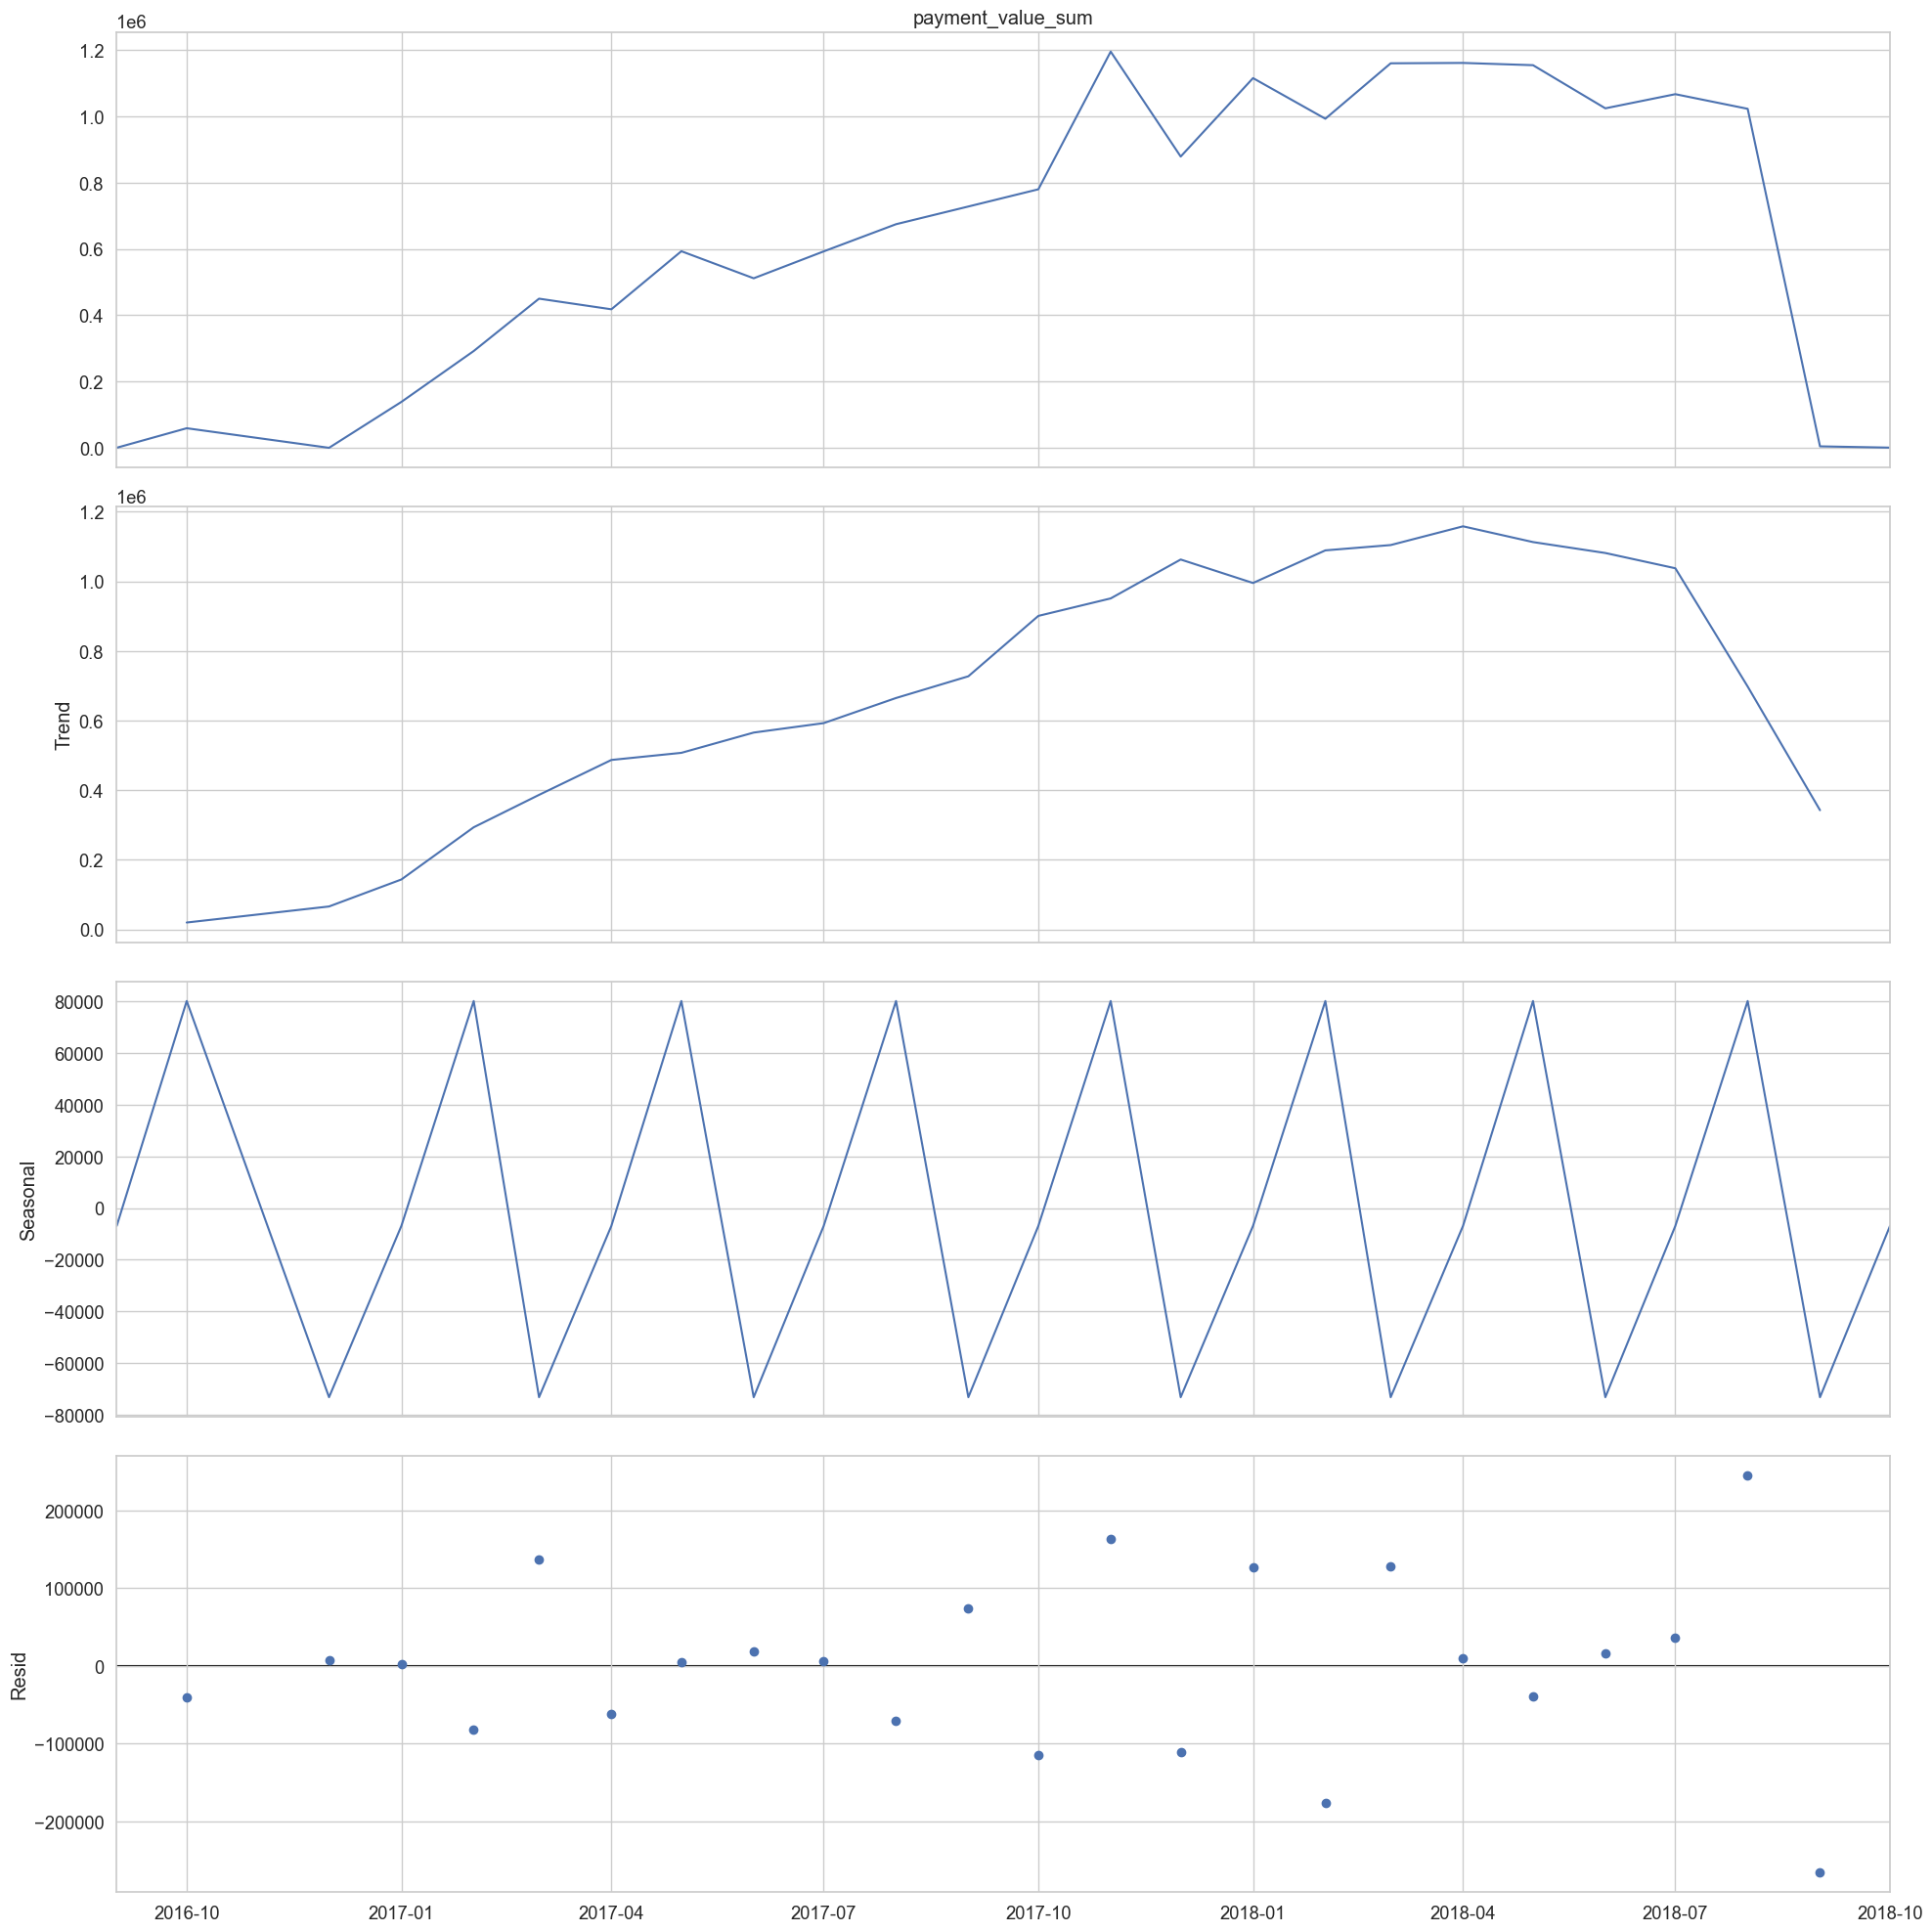

In [133]:
# decomposition ca total par mois

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.figsize": (20, 20)})
decomp_ca_mois = seasonal_decompose(ca_mois, model="additive", period=3)
decomp_ca_mois.plot()
plt.show()

In [134]:
seasonal_mois = decomp_ca_mois.seasonal
residu_mois = decomp_ca_mois.resid
trend_mois = decomp_ca_mois.trend
decomp_ca_mois_csv = ca_mois - seasonal_mois

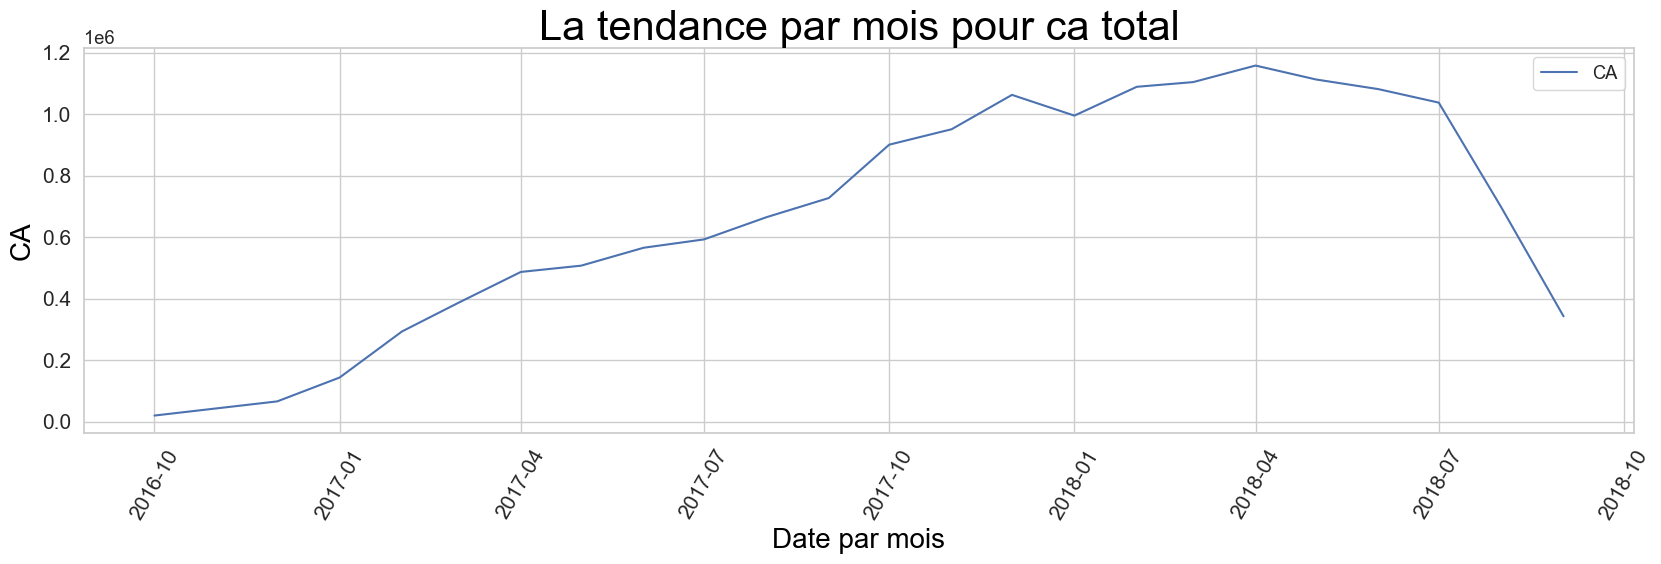

In [135]:
plt.figure(figsize=(20, 5))
plt.title("La tendance par mois pour ca total", fontdict=font1)
plt.xlabel("Date par mois", fontdict=font2)
plt.ylabel("CA", fontdict=font2)
plt.xticks(rotation=60, size=15)
plt.yticks(size=15)
data = trend_mois
sns.lineplot(data=data, x=data.index, y=data.values, label="CA");

In [136]:
# Le chiffre d'affaires a augmenté jusqu'en avril 2018, puis il a commencé à baisser.

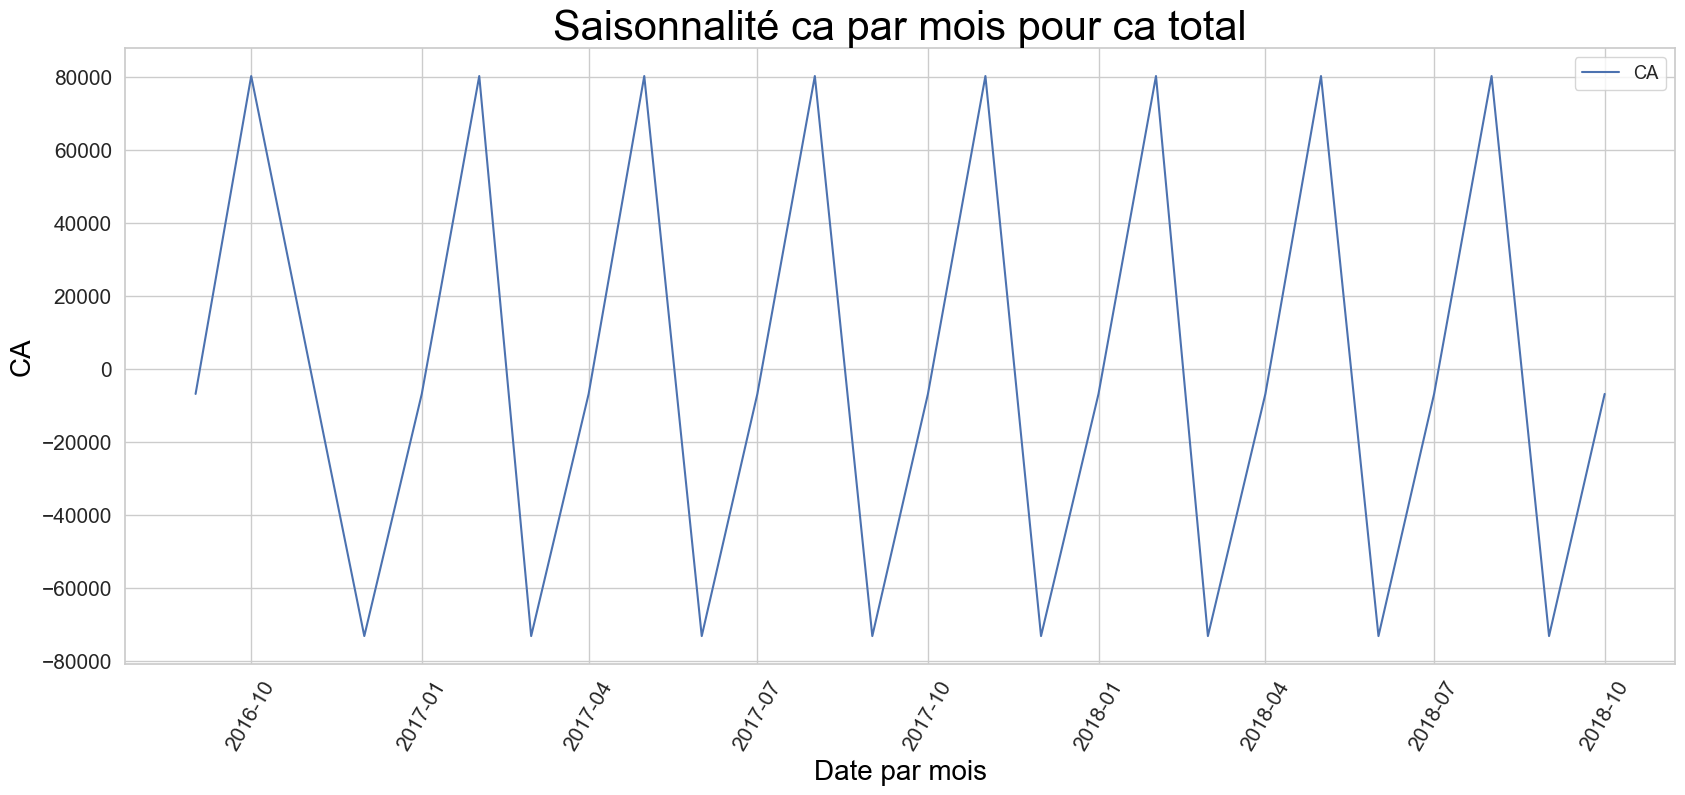

In [137]:
plt.figure(figsize=(20, 8))
plt.title("Saisonnalité ca par mois pour ca total", fontdict=font1)
plt.xlabel("Date par mois", fontdict=font2)
plt.ylabel("CA", fontdict=font2)
plt.xticks(rotation=60, size=15)
plt.yticks(size=15)
data = seasonal_mois
sns.lineplot(data=data, x=data.index, y=data.values, label="CA");

Si on analyse la saisonnalité trimestrielle, on constate deux mois d'augmentation du chiffre d'affaires, suivi d'un mois de baisse.

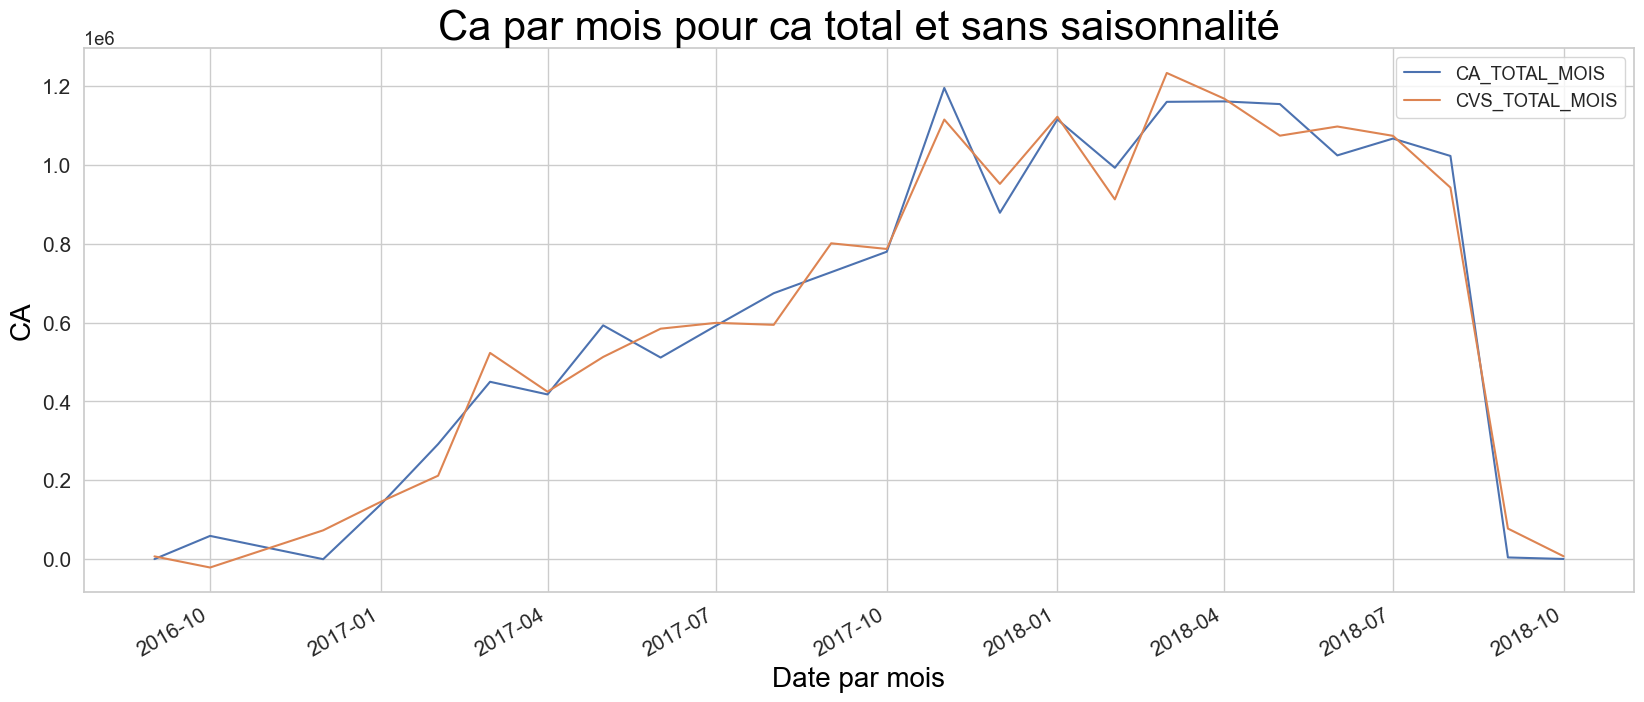

In [138]:
ca_mois = ca_mois.rename("CA_TOTAL_MOIS")
decomp_ca_mois_csv = decomp_ca_mois_csv.rename("CVS_TOTAL_MOIS")
ca_mois.plot(figsize=(20, 8), legend=True)
decomp_ca_mois_csv.plot(legend=True)
plt.xlabel("Date par mois", fontdict=font2)
plt.ylabel("CA", fontdict=font2)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Ca par mois pour ca total et sans saisonnalité", fontdict=font1);

## Panier moyen par client 

In [139]:
panier = (
    df_analyse.groupby("customer_unique_id")["payment_value_sum"].mean().reset_index()
)
panier.columns = ["customer_unique_id", "payment_value_mean"]
panier.head(3)

,customer_unique_id,payment_value_mean
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22


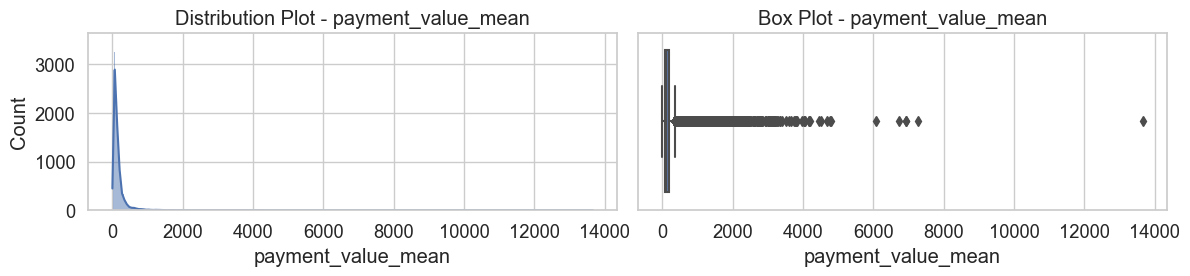

In [140]:
distplot_and_boxplot(panier, "payment_value_mean")

In [141]:
# Il y a des valeurs extrêmes pour le panier moyen.

## Indice de Gini - Courbe de Lorenz

In [142]:
group_client = (
    df_analyse.groupby("customer_unique_id")["payment_value_sum"].sum().reset_index()
)
group_client.head()

,customer_unique_id,payment_value_sum
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


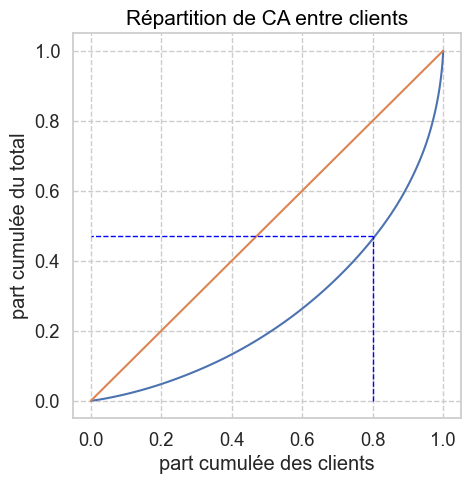

In [143]:
plt.figure(figsize=(5, 5))
dep = group_client["payment_value_sum"].values
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0], lorenz)  # La courbe de Lorenz commence à 0
plt.ylabel("part cumulée du total")
plt.xlabel("part cumulée des clients")
xaxis = np.linspace(
    0 - 1 / n, 1 + 1 / n, n + 1
)  # Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis, lorenz, drawstyle="steps-post")
plt.plot([0, 1], [0, 1])  # tracer la bisséctrice
plt.vlines(
    x=0.8, ymin=0, ymax=0.47, color="blue", linestyle="--", linewidth=1, label="Medial"
)
plt.hlines(xmin=0.8, xmax=0, y=0.47, color="blue", linestyle="--", linewidth=1)
font1 = {"color": "black", "size": 15}
plt.title("Répartition de CA entre clients", fontdict=font1)
plt.grid(True, which="both", linestyle="--")
plt.show()

In [144]:
AUC = (
    lorenz.sum() - lorenz[-1] / 2 - lorenz[0] / 2
) / n  # Surface sous la courbe de Lorenz.
# Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2,
# on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC  # surface entre la première bissectrice et le courbe de Lorenz
gini = 2 * S
round(gini, 2)

0.48

In [145]:
# 50% de CA viens d'environ 80% des clients
# Environ 20% de clients génèrent 50% de ca

# Feature Engineering

In [146]:
df_analyse.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_customer_date', 'nb_product', 'price_sum',
       'nb_product_categ', 'customer_unique_id', 'customer_city',
       'customer_state', 'customer_lat', 'customer_lng',
       'payment_sequential_max', 'payment_type_num', 'payment_value_sum',
       'review_score_mean', 'order_year', 'order_month', 'order_day',
       'date_month'],
      dtype='object')

In [147]:
col_for_plus = [
    "order_id",
    "customer_id",
    "customer_unique_id",
    "order_status",
    "order_purchase_timestamp",
    "order_delivered_customer_date",
    "payment_value_sum",
    "review_score_mean",
    "customer_lat",
    "customer_lng",
]

In [148]:
df_for_plus = df_analyse[col_for_plus]
print(df_for_plus.shape)
df_for_plus.head(2)

(99440, 10)


,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,order_delivered_customer_date,payment_value_sum,review_score_mean,customer_lat,customer_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,38.71,4.0,-23.574809,-46.587471
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,141.46,4.0,-12.169860,-44.988369


## On va crée les colonnes deliver duration et days_since_last order 

In [149]:
df_for_plus["deliver_duration"] = (
    df_for_plus["order_delivered_customer_date"]
    - df_for_plus["order_purchase_timestamp"]
).dt.days

df_for_plus["days_since_lastorder"] = (
    df_for_plus["order_purchase_timestamp"].max()
    - df_for_plus["order_purchase_timestamp"]
).dt.days

In [150]:
df_for_plus.drop("order_delivered_customer_date", axis=1, inplace=True)
df_for_plus.head()

,order_id,customer_id,customer_unique_id,order_status,order_purchase_timestamp,payment_value_sum,review_score_mean,customer_lat,customer_lng,deliver_duration,days_since_lastorder
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,38.71,4.0,-23.574809,-46.587471,8.0,380
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,af07308b275d755c9edb36a90c618231,delivered,2018-07-24 20:41:37,141.46,4.0,-12.169860,-44.988369,13.0,84
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,3a653a41f6f9fc3d2a113cf8398680e8,delivered,2018-08-08 08:38:49,179.12,5.0,-16.746337,-48.514624,9.0,70
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,7c142cf63193a1473d2e66489a9ae977,delivered,2017-11-18 19:28:06,72.20,5.0,-5.767733,-35.275467,13.0,332
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,72632f0f9dd73dfee390c9b22eb56dd6,delivered,2018-02-13 21:18:39,28.62,5.0,-23.675037,-46.524784,2.0,245


In [151]:
df_for_plus.isnull().sum()

order_id                       0
customer_id                    0
customer_unique_id             0
order_status                   0
order_purchase_timestamp       0
payment_value_sum              0
review_score_mean              0
customer_lat                 278
customer_lng                 278
deliver_duration            2965
days_since_lastorder           0
dtype: int64

In [152]:
df_filled_plus = df_for_plus.copy()

In [153]:
# On va imputer les valeurs manquantes avec median de la colonne
df_filled_plus["deliver_duration"].fillna(
    df_filled_plus["deliver_duration"].median(), inplace=True
)

In [154]:
df_filled_plus.isnull().sum()

order_id                      0
customer_id                   0
customer_unique_id            0
order_status                  0
order_purchase_timestamp      0
payment_value_sum             0
review_score_mean             0
customer_lat                278
customer_lng                278
deliver_duration              0
days_since_lastorder          0
dtype: int64

# <a name="C7"> 4.1 Création des variables Recence Fréquence Montant Review(satisfaction) Deliver duration(durée livraison)</a>

<a href="#top">sommaire</a>

In [155]:
# Creation de RFM segmentation

rfm_plus = df_filled_plus.groupby("customer_unique_id").agg(
    {
        "days_since_lastorder": "min",
        "order_id": "count",
        "payment_value_sum": "sum",
        "review_score_mean": "mean",
        "deliver_duration": "mean",
        "order_purchase_timestamp": "min",
        "customer_lat": "mean",
        "customer_lng": "mean"
    }
)
rfm_plus.columns = [
    "Recency",
    "Frequency",
    "MonetaryValue",
    "review_mean",
    "deliver_duration_mean",
    "last_order_purchase_timestamp",
    "customer_lat", "customer_lng"    
]
rfm_plus = rfm_plus.reset_index()
print(rfm_plus.shape)
rfm_plus.head(5)

(96095, 9)


,customer_unique_id,Recency,Frequency,MonetaryValue,review_mean,deliver_duration_mean,last_order_purchase_timestamp,customer_lat,customer_lng
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,5.0,6.0,2018-05-10 10:56:27,-23.335331,-46.828647
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,4.0,3.0,2018-05-07 11:11:27,-23.567395,-46.792957
2,0000f46a3911fa3c0805444483337064,585,1,86.22,3.0,25.0,2017-03-10 21:05:03,-27.543787,-48.625680
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,4.0,20.0,2017-10-12 20:29:41,-1.311011,-48.482884
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,5.0,13.0,2017-11-14 19:45:42,-23.504368,-47.466156


In [156]:
cols_rfm = [
    "customer_unique_id",
    "Recency",
    "Frequency",
    "MonetaryValue",
    "last_order_purchase_timestamp",
]
rfm = rfm_plus[cols_rfm]
rfm.head(3)

,customer_unique_id,Recency,Frequency,MonetaryValue,last_order_purchase_timestamp
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,585,1,86.22,2017-03-10 21:05:03


In [157]:
rfm_plus.describe()

,Recency,Frequency,MonetaryValue,review_mean,deliver_duration_mean,last_order_purchase_timestamp,customer_lat,customer_lng
count,96095.000000,96095.000000,96095.000000,96095.000000,96095.000000,96095,95827.000000,95827.000000
mean,287.730756,1.034809,166.594226,4.085048,12.041088,2017-12-30 19:26:14.173963008,-21.181147,-46.173530
min,0.000000,1.000000,0.000000,1.000000,0.000000,2016-09-04 21:15:19,-36.605374,-72.666706
25%,163.000000,1.000000,63.120000,4.000000,6.000000,2017-09-11 19:53:42,-23.588182,-48.110368
50%,268.000000,1.000000,108.000000,5.000000,10.000000,2018-01-18 13:36:21,-22.925733,-46.631112
75%,397.000000,1.000000,183.530000,5.000000,15.000000,2018-05-04 10:40:48,-20.125078,-43.599277
max,772.000000,17.000000,13664.080000,5.000000,209.000000,2018-10-17 17:30:18,42.184003,-8.577855
std,153.407846,0.214385,231.428912,1.336341,9.415758,NaN,5.633588,4.068710


In [158]:
rfm_plus.sort_values("Recency").head()

,customer_unique_id,Recency,Frequency,MonetaryValue,review_mean,deliver_duration_mean,last_order_purchase_timestamp,customer_lat,customer_lng
50974,87ab9fec999db8bd5774917de3cdf01c,0,1,89.71,1.0,10.0,2018-10-17 17:30:18,-23.450594,-47.475700
14363,262e1f1e26e92e86375f86840b4ffd63,0,2,444.06,5.0,12.5,2018-06-11 16:51:47,-7.077400,-41.470740
65953,af5454198a97379394cacf676e1e96cb,13,3,592.65,1.0,9.0,2018-08-10 10:39:43,-24.492030,-47.834131
37382,634420a0ea42302205032ed44ac7fccc,16,2,160.76,2.0,8.0,2018-08-16 13:09:43,-22.609470,-43.912344
58523,9bb92bebd4cb7511e1a02d5e50bc4655,18,1,137.03,1.0,10.0,2018-09-29 09:13:03,-23.409499,-46.396566


In [159]:
rfm_plus.sort_values("Frequency", ascending=False).head()

,customer_unique_id,Recency,Frequency,MonetaryValue,review_mean,deliver_duration_mean,last_order_purchase_timestamp,customer_lat,customer_lng
52972,8d50f5eadf50201ccdcedfb9e2ac8455,57,17,927.63,4.764706,4.117647,2017-05-15 23:30:03,-23.617639,-46.638981
23472,3e43e6105506432c953e165fb2acf44c,231,9,1172.66,2.777778,13.666667,2017-09-18 18:53:15,-24.014675,-46.420225
37797,6469f99c1f9dfae7733b25662e7f1782,111,7,758.83,5.000000,3.714286,2017-09-19 01:02:44,-23.967890,-46.344121
76081,ca77025e7201e3b30c44b472ff346268,138,7,1122.72,5.000000,16.428571,2017-10-09 12:34:39,-8.124466,-34.896920
10354,1b6c7548a2a1f9037c1fd3ddfed95f33,245,7,959.01,5.000000,13.000000,2017-11-13 16:44:41,-18.952110,-49.457495


In [160]:
rfm_plus.sort_values("MonetaryValue", ascending=False).head()

,customer_unique_id,Recency,Frequency,MonetaryValue,review_mean,deliver_duration_mean,last_order_purchase_timestamp,customer_lat,customer_lng
3826,0a0a92112bd4c708ca5fde585afaa872,383,1,13664.08,1.0,18.000000,2017-09-29 15:24:52,-22.901095,-43.182559
26456,46450c74a0d8c5ca9395da1daac6c120,60,3,9553.02,1.0,9.333333,2018-07-24 20:41:01,-27.578659,-48.507096
81961,da122df9eeddfedc1dc1f5349a1a690c,564,2,7571.63,5.0,15.000000,2017-04-01 15:58:40,-22.871875,-42.269220
44447,763c8b1c9c68a0229c42c9fc6f662b93,94,1,7274.88,1.0,11.000000,2018-07-15 14:49:44,-20.376161,-40.305294
82807,dc4802a71eae9be1dd28f5d788ceb526,611,1,6929.31,5.0,18.000000,2017-02-12 20:37:36,-20.500241,-54.568666


In [161]:
rfm_plus.sort_values("review_mean").head()

,customer_unique_id,Recency,Frequency,MonetaryValue,review_mean,deliver_duration_mean,last_order_purchase_timestamp,customer_lat,customer_lng
87875,e9f50caf99f032f0bf3c55141f019d99,191,1,56.04,1.0,30.0,2018-04-08 20:11:50,-3.744128,-38.510859
10089,1aaca30bd5cf8fb6ff0453d04a2f39ea,420,1,201.65,1.0,1.0,2017-08-23 16:38:43,-23.540069,-46.593450
90379,f0b455e0ba8ae5c44f91438d043cb302,234,1,75.65,1.0,24.0,2018-02-25 15:10:10,-22.868008,-43.344589
73204,c2c2e11a5d4fa8be8c59a922978b8115,265,1,21.43,1.0,4.0,2018-01-25 07:39:35,-23.601163,-46.716669
22004,3a6130b1b5ce0172f5ef08111138f8e3,233,1,97.01,1.0,36.0,2018-02-26 16:19:39,-21.592175,-46.893896


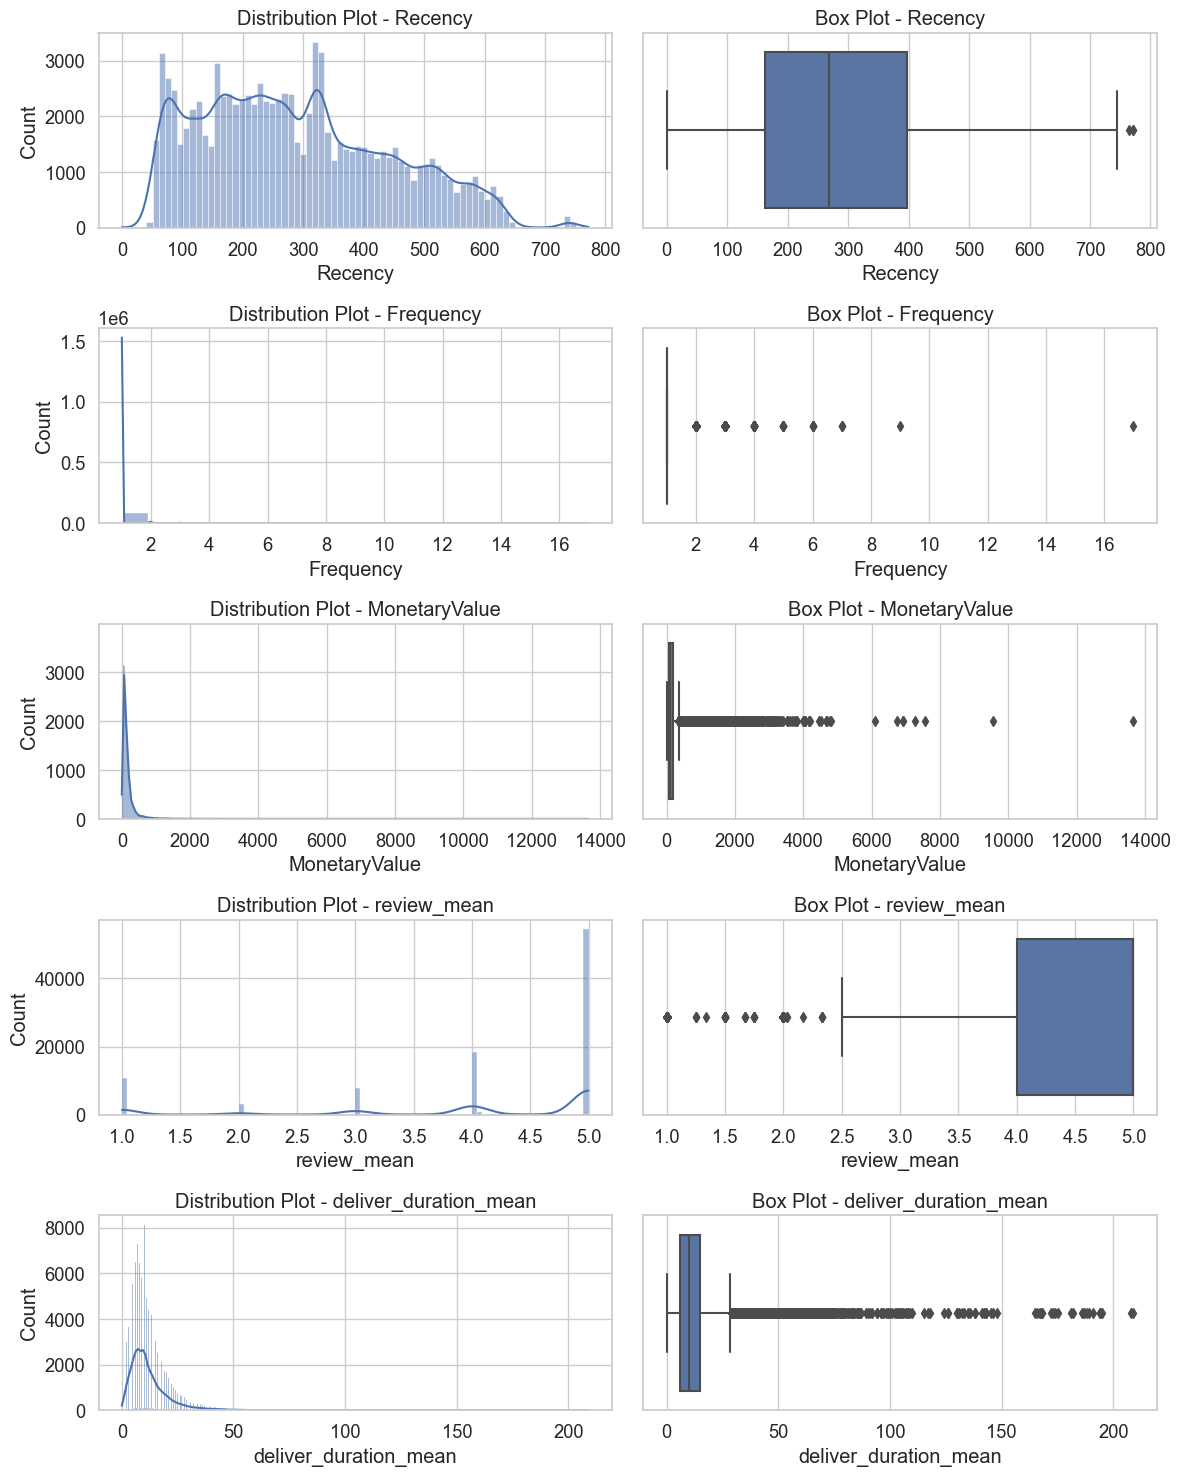

In [162]:
columns_graph = [
    "Recency",
    "Frequency",
    "MonetaryValue",
    "review_mean",
    "deliver_duration_mean",
]
# columns = rfm_plus.select_dtypes(include=["number"]).columns.tolist()
distplot_and_boxplot(rfm_plus, columns_graph, figsize=(12, 3))

## Nous avons observé des valeurs extrêmes d'après les boxplots, mais elles ne sont pas considérées comme des outliers. Afin de ne pas perdre les informations des clients, nous avons décidé de les conserver plutôt que de les supprimer.

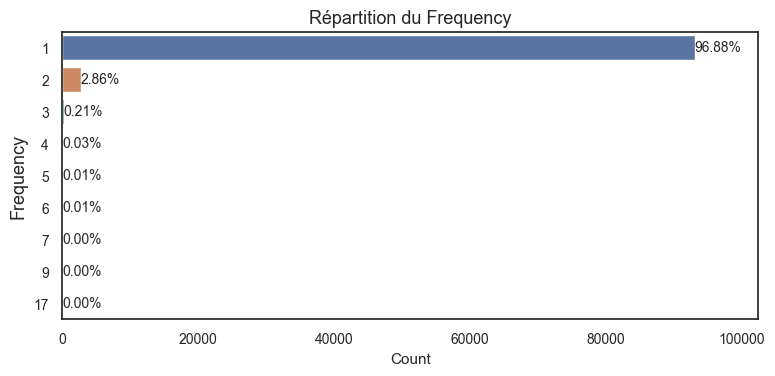

In [163]:
countplot(rfm_plus, "Frequency", figsize=(8, 4))

Il y a  45 unique  review_mean dans notre data.


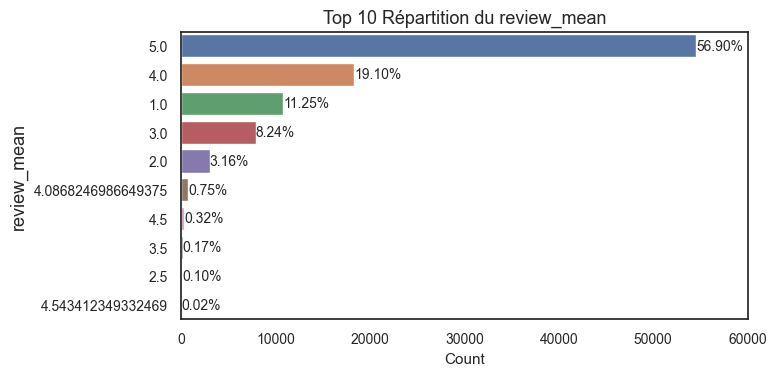

In [164]:
countplot_top10(rfm_plus, "review_mean", figsize=(8, 4))

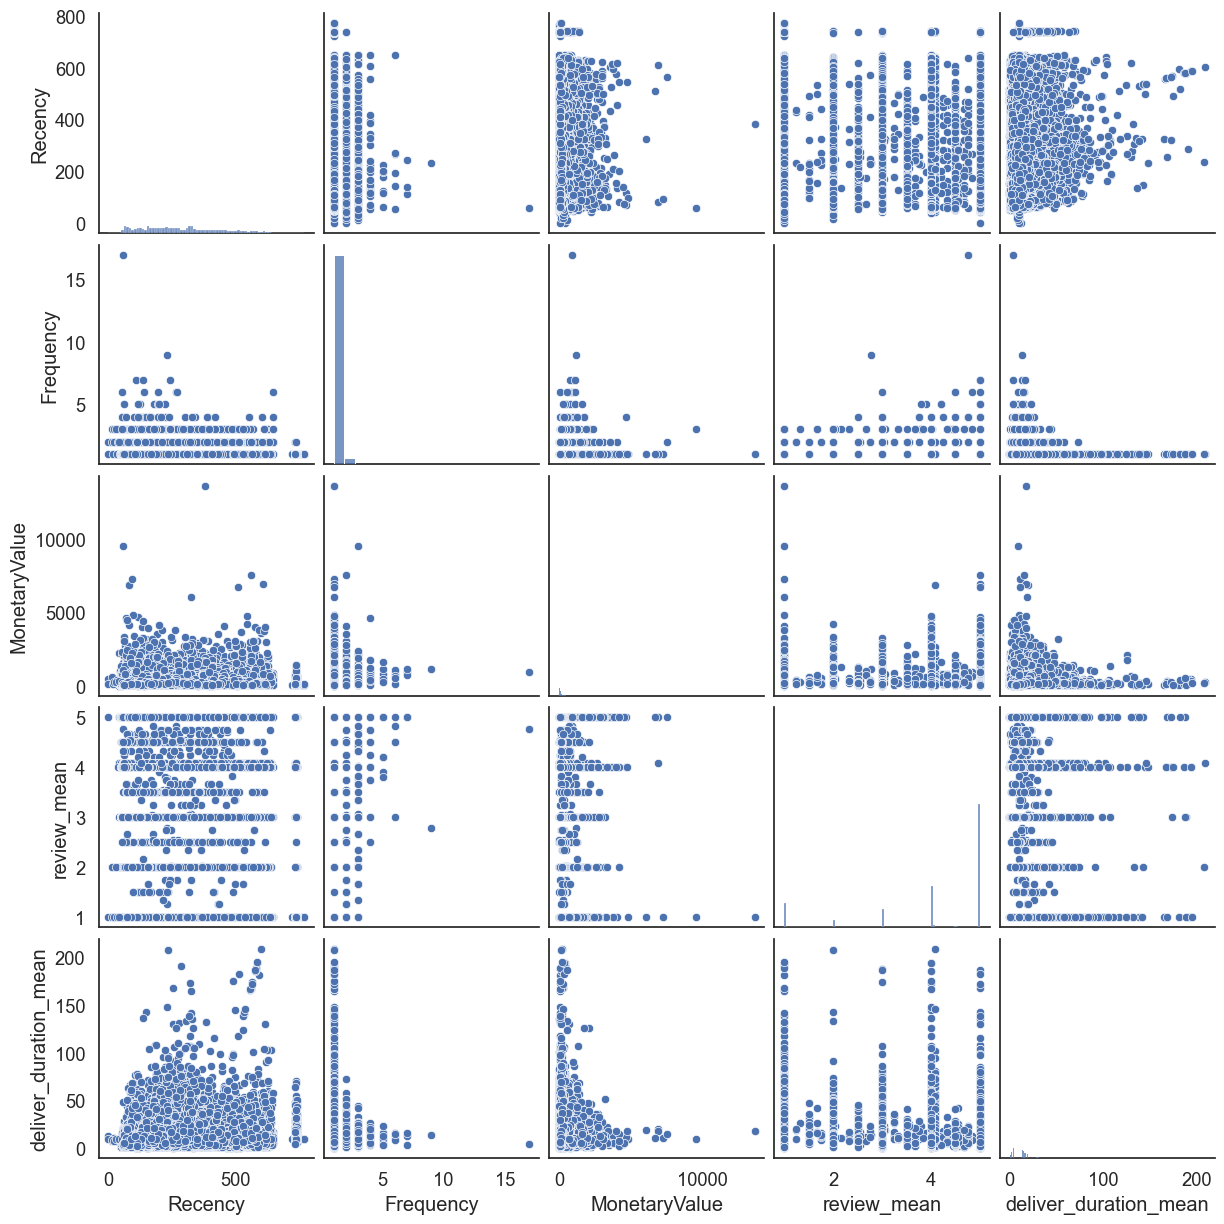

In [165]:
sns.pairplot(rfm_plus[['Recency', 'Frequency', 'MonetaryValue',
       'review_mean', 'deliver_duration_mean']]);

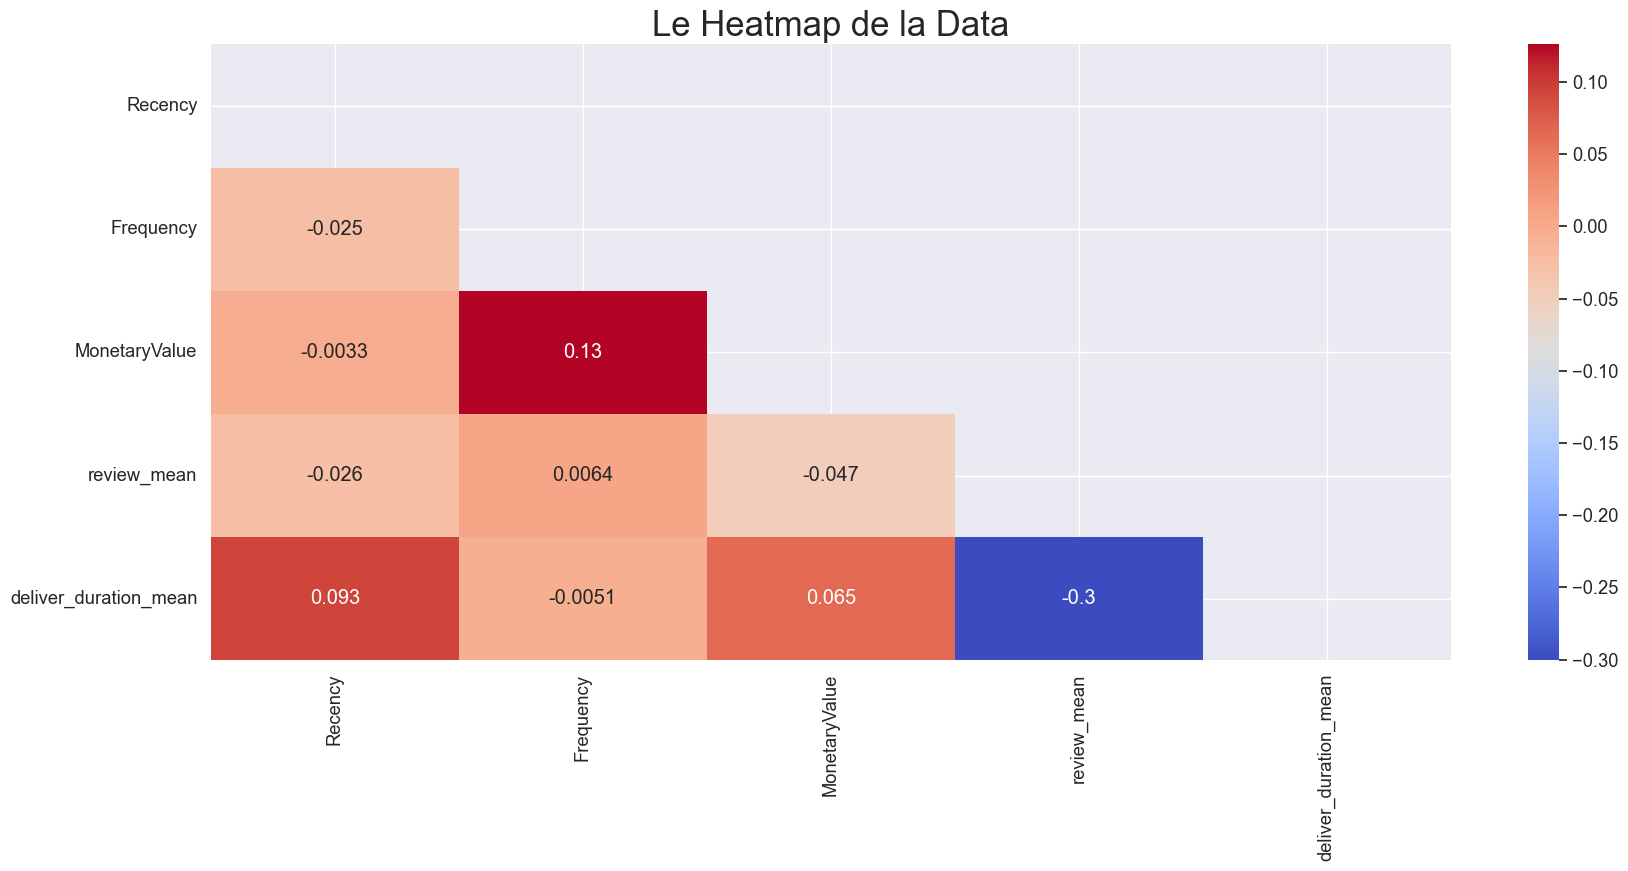

In [166]:
heatmap(rfm_plus[['Recency', 'Frequency', 'MonetaryValue',
       'review_mean', 'deliver_duration_mean']])

# <a name="C8"> Création de fichier csv avec des données nettoyées et imputées </a>
<a href="#top">sommaire</a>

In [167]:
# On va exporter le dataframe
# rfm_plus.to_csv("rfm_plus_geo.csv", index=False)